# **Heart Disease Prediction**
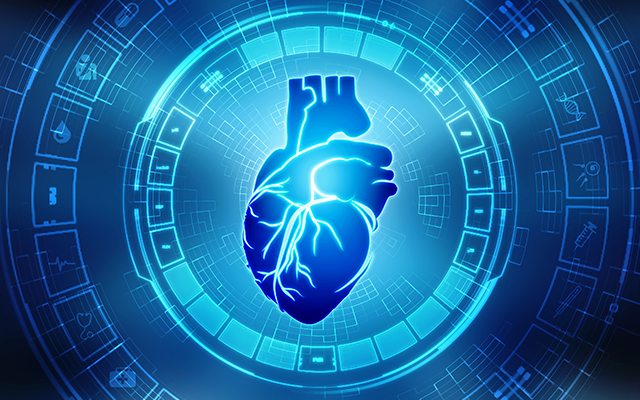

**By:** Praveen Choudhary

### **Introduction:**
The dataset provided consists of health-related attributes of individuals collected from four different locations in 1988, with the aim of predicting the presence of heart disease. From an initial pool of 76 attributes, research has primarily focused on utilizing a subset of 12 key features. These features encompass demographic details, medical history, and diagnostic indicators such as chest pain type, blood pressure, and electrocardiographic results. The target variable denotes the presence or absence of heart disease, serving as a crucial factor in medical diagnosis and prognosis. Employing machine learning techniques on this dataset presents an opportunity to develop predictive models aiding healthcare professionals in early detection and intervention strategies for cardiovascular conditions.

#### **Objective:**
The primary objective of this machine learning project is to construct a predictive model capable of accurately identifying the presence of heart disease based on the provided dataset. Through the utilization of various classification algorithms, feature selection techniques, and model evaluation metrics, the goal is to develop a dependable tool for supporting medical practitioners in diagnosing cardiovascular conditions. Additionally, the project seeks to investigate the significance of different features in predicting heart disease and uncover underlying patterns within the data to enhance diagnostic accuracy.

#### **Problem Statement:**
The challenge at hand involves building a robust machine learning model capable of effectively classifying individuals as either having or not having heart disease based on their health attributes. Key tasks include handling the complexity of medical data, addressing potential missing values or outliers, and identifying the most informative features for model training. Furthermore, it's essential to optimize the model's performance while ensuring its interpretability and generalizability across diverse patient populations. Ultimately, the objective is to develop a tool that can support healthcare professionals in making timely and accurate decisions concerning the diagnosis and management of heart disease.

In [173]:
# import some library
import pandas as pd
import numpy as np
import warnings
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
ImportWarning
# Ignore warnings
warnings.filterwarnings("ignore")

import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix,classification_report

**Read Data From CSV Using Pandas**

In [174]:
# read csv
data = pd.read_csv('heart.csv')

In [175]:
# first 5 items
data.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [176]:
# last 5 items
data.tail(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

**Exploratory Data Analysis (EDA):**

Exploratory Data Analysis (EDA) involves examining the dataset to understand its structure and characteristics. Through EDA, insights can be gleaned regarding relationships between variables and potential patterns within the data, aiding in the formulation of hypotheses and informing subsequent modeling decisions.

In [177]:
# info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [178]:
# Display data types of columns
print(data.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [179]:
# Display number of rows and columns
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])


Number of rows: 918
Number of columns: 12


#### **About Dataset**


The dataset comprises health-related attributes collected from individuals across four locations. It includes 12 key attributes such as age, sex, chest pain type, blood pressure, cholesterol levels, and electrocardiographic results, with a total of 918 records. The target variable indicates the presence (1) or absence (0) of heart disease, facilitating medical diagnosis and prognosis.



| Attribute           | Description                                                                                               |
|---------------------|-----------------------------------------------------------------------------------------------------------|
| **Age**             | The age of the patient.                                                                                   |
| **Sex**             | The gender of the patient (0 for female, 1 for male).                                                     |
| **ChestPainType**   | Categorized into four values representing different types of chest pain experienced by the patient.       |
| **RestingBP**       | The blood pressure of the patient while at rest.                                                          |
| **Cholesterol**     | The level of cholesterol in the patient's blood, measured in mg/dl (milligrams per deciliter).             |
| **FastingBS**       | Indicates whether the patient's fasting blood sugar level is above 120 mg/dl (0 for below 120 mg/dl, 1 for above 120 mg/dl). |
| **RestingECG**      | Categorized into three values representing different results from resting electrocardiogram (ECG) tests.  |
| **MaxHR**           | The highest heart rate recorded during the patient's exercise test.                                       |
| **ExerciseAngina**  | Indicates whether the patient experienced angina (chest pain or discomfort) induced by exercise (0 for no, 1 for yes). |
| **Oldpeak**         | ST depression induced by exercise relative to rest, measured on an electrocardiogram.                     |
| **ST_Slope**        | Categorized into three values representing the slope of the peak exercise ST segment during the patient's exercise test. |
| **HeartDisease**    | The target variable indicating the presence of heart disease in the patient (0 for no disease, 1 for disease). |


**Summary Statistics:**

Summary statistics provide key numerical measures that summarize the central tendency, dispersion, and shape of a dataset. These statistics, including mean, median, standard deviation, and quartiles, offer insights into the distribution and characteristics of the data.

In [180]:
# data describe
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

**Check Missing Values:**

In [181]:
# Count null values in each column
print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


> There are no missing values in this dataset.

**Summary About The Data**

In [182]:
# Get unique values in each categorical column
for column_name in data.select_dtypes(include=['object', 'category']).columns:
    unique_values = data[column_name].unique()
    print(f"Unique values in categorical column '{column_name}':\n{unique_values}\n")

Unique values in categorical column 'Sex':
['M' 'F']

Unique values in categorical column 'ChestPainType':
['ATA' 'NAP' 'ASY' 'TA']

Unique values in categorical column 'RestingECG':
['Normal' 'ST' 'LVH']

Unique values in categorical column 'ExerciseAngina':
['N' 'Y']

Unique values in categorical column 'ST_Slope':
['Up' 'Flat' 'Down']



In [183]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [184]:
data.groupby(['Sex','HeartDisease'])['Age'].mean()

Sex  HeartDisease
F    0               51.202797
     1               56.180000
M    0               50.202247
     1               55.868996
Name: Age, dtype: float64

**For the 'Sex' column:**

> When the sex is female (denoted by 'F'), the average heart disease rate is approximately 51.20% for individuals without heart disease and approximately 56.18% for individuals with heart disease.

> When the sex is male (denoted by 'M'), the average heart disease rate is approximately 50.20% for individuals without heart disease and approximately 55.87% for individuals with heart disease.

In [185]:
data.groupby(['HeartDisease'])['Age'].count()

HeartDisease
0    410
1    508
Name: Age, dtype: int64

#### **Visualization** 📊📈
Explore the dataset through engaging visualizations to uncover trends, patterns, and relationships between variables, enhancing understanding and insights.

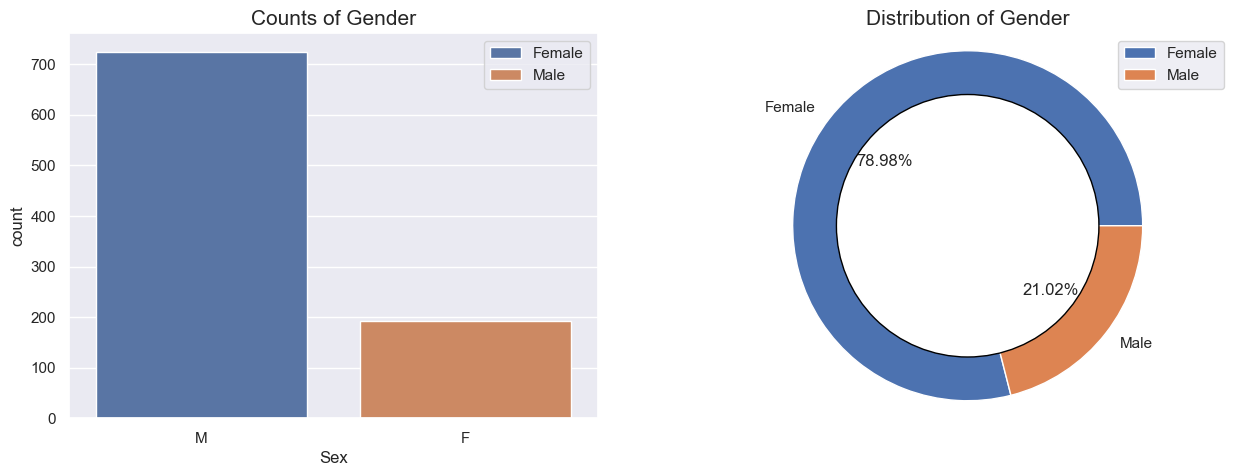

In [186]:
# Plotting For Gender

labels = ['Female', 'Male']
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Sex', hue='Sex', alpha=1)
plt.legend(labels)
plt.title('Counts of Gender',size=15)

plt.subplot(1, 2, 2)  
female, male = data['Sex'].value_counts()
y = [female, male]
explode = [0, 0.0]
labels = ['Female', 'Male']
plt.pie(y, labels=labels, explode=explode,autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Distribution of Gender', size=15)
plt.show()


**Counts of Gender:**
+ This bar graph represents the number of individuals in a given dataset based on their gender.
+ There are two bars:
    + The taller blue bar represents males, with approximately 725 individuals.
    + The shorter orange bar represents females, with around 193 individuals.
+ There are significantly more males than females in this dataset.

**Distribution of Gender:**
+ This pie chart illustrates the proportion of each gender in the same dataset.
+ The blue section represents males, constituting approximately 78.98% of the total.
+ The orange section represents females, making up about 21.02%.


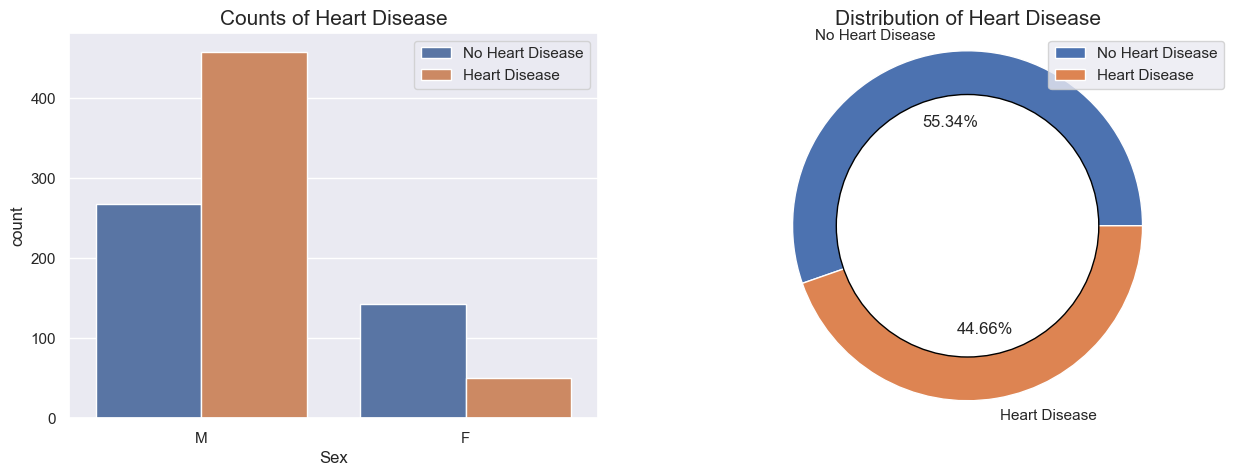

In [187]:
# Plotting for HeartDisease

labels = ['No Heart Disease', 'Heart Disease']
plt.figure(figsize=(15, 5))

# Subplot for count plot
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='Sex', hue='HeartDisease', alpha=1)
plt.legend(labels)
plt.title('Counts of Heart Disease', size=15)

# Subplot for pie chart
plt.subplot(1, 2, 2)  
no_disease, disease = data['HeartDisease'].value_counts()
y = [no_disease, disease]
explode = [0, 0.0]
plt.pie(y, labels=labels, explode=explode, autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.title('Distribution of Heart Disease', size=15)

plt.show()


**Counts of Heart Disease:**
+ This bar graph represents the number of individuals in a given dataset based on their gender and heart disease status.
+ There are two bars:
    + The taller orange bar represents males (M), with approximately 480 individuals.
    + The shorter blue bar represents females (F), with around 280 individuals.
    + Within each gender group, there are two segments:
        + The left segment (orange) represents individuals with no heart disease.
        + The right segment (blue) represents individuals with heart disease.
+ In summary, more males are represented in both categories (with and without heart disease) compared to females.

**Distribution of Heart Disease:**
+ This donut chart illustrates the overall percentage distribution of individuals with and without heart disease in the same dataset.
+ The orange section represents no heart disease, constituting approximately 55.34% of the total.
+ The blue section represents individuals with heart disease, making up about 44.66%.
+ Overall, a majority (55.34%) do not have heart disease, while a significant portion (44.66%) have heart disease.

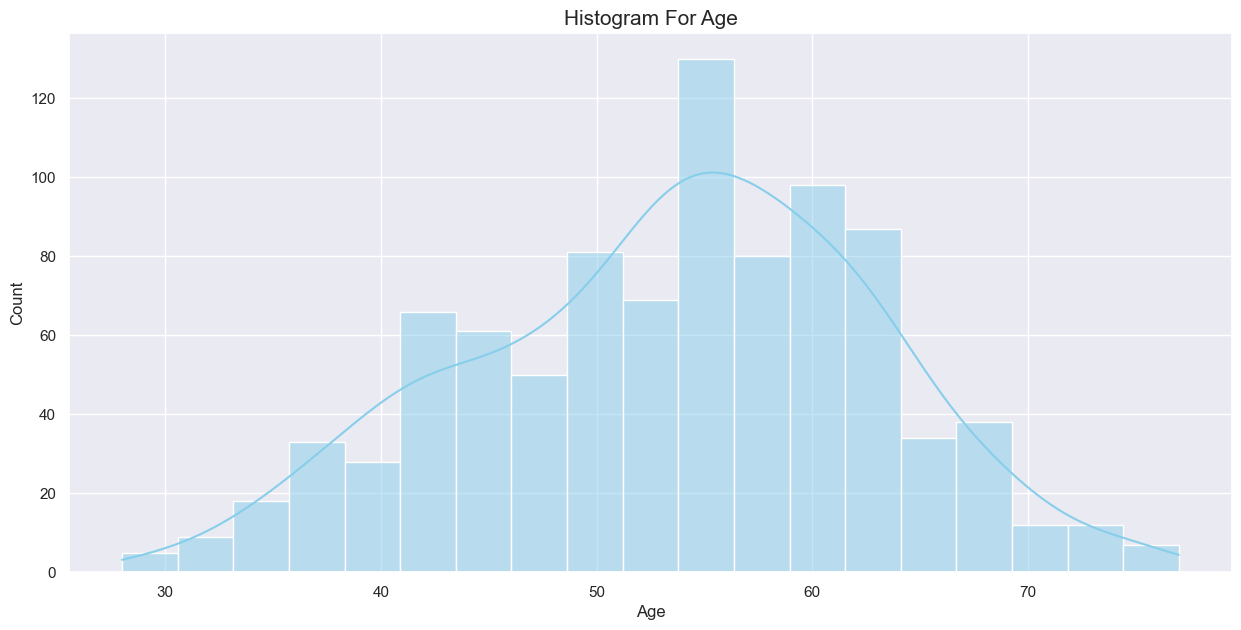

In [188]:
plt.figure(figsize=(15,7))
sns.histplot(data['Age'],kde=True,color='skyblue')
plt.title('Histogram For Age', size=15)
plt.show()

+ The bars represent the counts of individuals in specific age groups.
+ They are colored in light blue.
+ The tallest bar is around the age of 55, indicating that this is the most common age group in this particular dataset.

+ There’s an overlaid line graph that smoothly connects the tops of each bar.
+ This line graph provides a smoother representation of the data distribution.

+ Most people in this dataset are around 50 - 60  years old as indicated by the tallest bar.

In [189]:
data.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

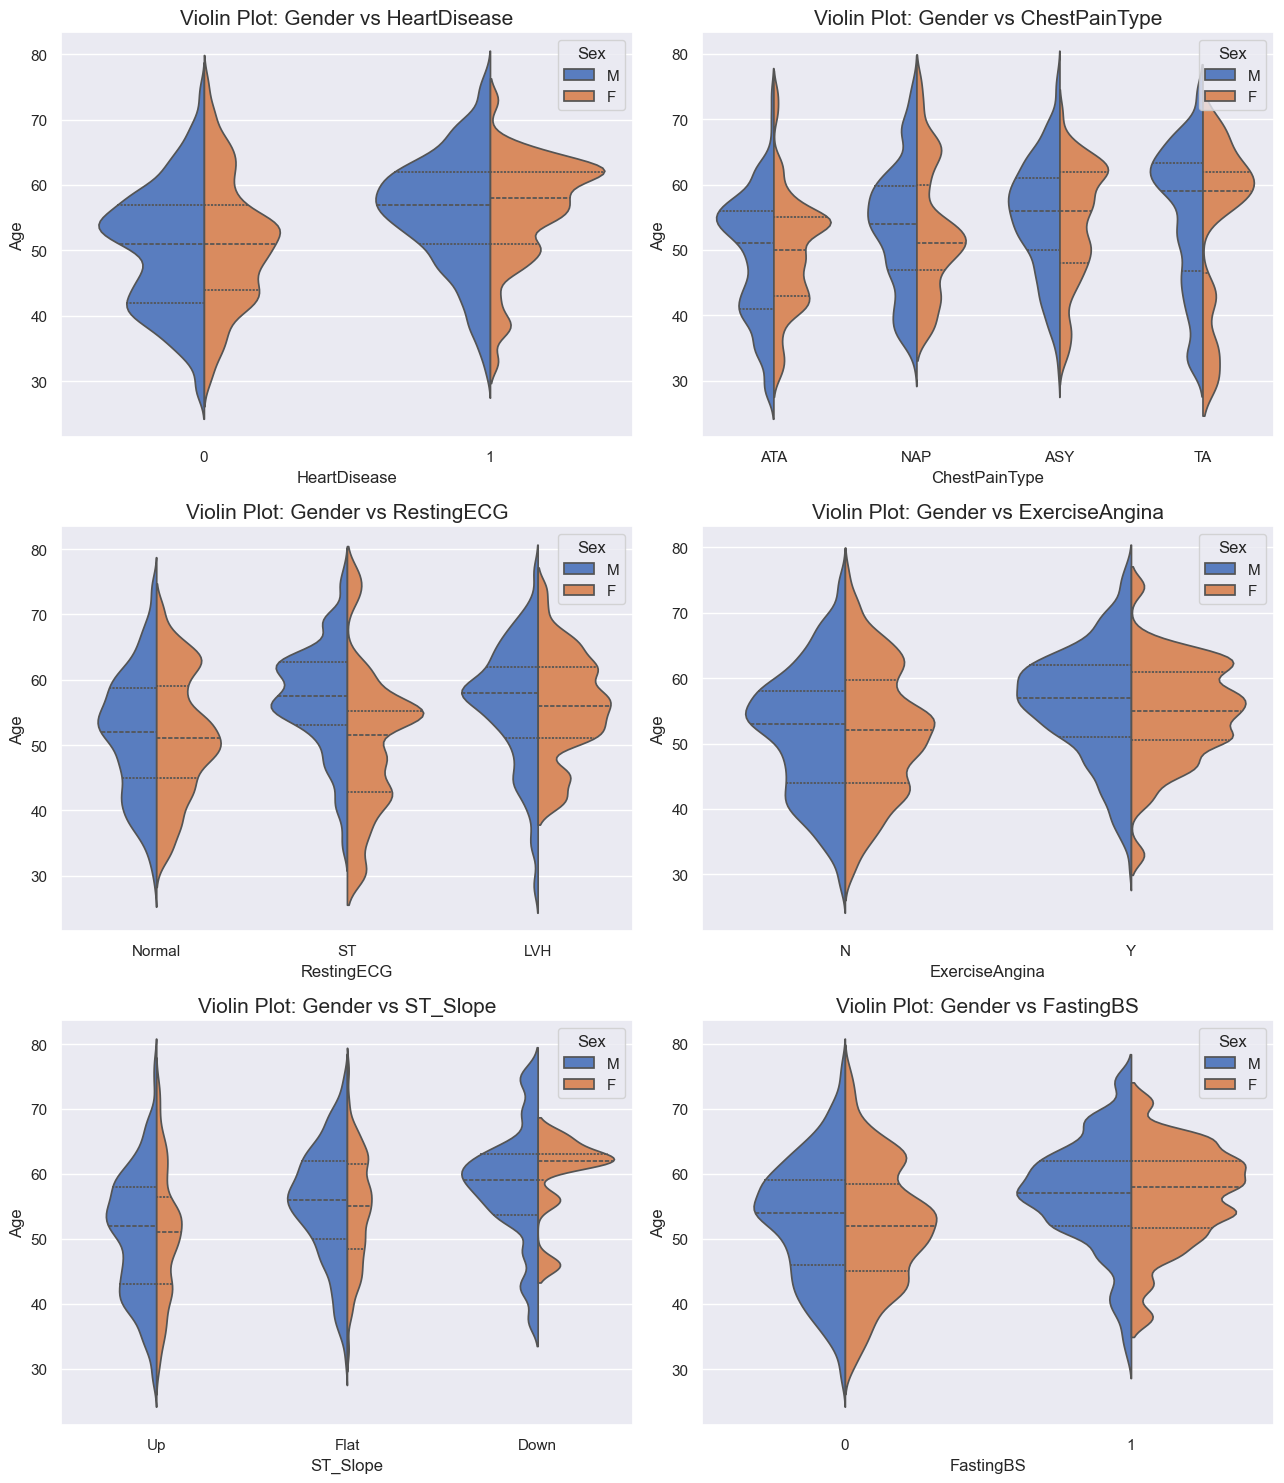

In [190]:
plt.figure(figsize=(13, 15))  # Adjust figure size as needed

# List of variables for which you want to create violin plots
variables = ['HeartDisease', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope','FastingBS']

# Loop through the variables and create violin plots
for i, variable in enumerate(variables, start=1):
    plt.subplot(3, 2, i)  # Adjust the subplot arrangement as needed
    sns.violinplot(data=data, x=variable, y="Age", hue="Sex", split=True, bw=.2, inner="quart", palette="muted")
    plt.title(f'Violin Plot: Gender vs {variable}', size=15)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

1. **Violin Plot: Gender vs Heart Disease:**
    + This plot compares gender (male and female) with the presence or absence of heart disease.
    + The blue section represents males (M), and the orange section represents females (F).
    + The vertical spread of each violin plot shows the distribution of heart disease cases (1) and no heart disease cases (0) within each 
gender group.

2. **Violin Plot: Gender vs Chest Pain Type:**
    + **This plot compares gender with different types of chest pain.**
    + **The x-axis shows chest pain types: Atypical angina (Ata), Non-anginal pain (NAP), Typical angina (Ta), and Asymptomatic (Asy).**
    + **The violin plots for males (M) and females (F) display the distribution of each chest pain type.**

3. **Violin Plot: Gender vs Resting ECG:**
    + **This plot compares gender with resting electrocardiogram (ECG) results.**
    + **The x-axis shows ECG categories: Normal, ST-T wave abnormality (ST), and Left ventricular hypertrophy (Lvh).**
    + **The violin plots for males (M) and females (F) represent the distribution of ECG results.**

4. **Violin Plot: Gender vs Exercise-Induced Angina:**
    + **This plot compares gender with exercise-induced angina.**
    + **The x-axis shows angina status: No (N) and Yes (Y).**
    + **The violin plots for males (M) and females (F) illustrate the distribution of angina cases.**

5. **Violin Plot: Gender vs ST Slope:**
    + **This plot compares gender with ST segment slope values.**
    + **The x-axis shows slope categories: Upward (Up), Flat (Flat), and Downward (Down).**
    + **The violin plots for males (M) and females (F) depict the distribution of ST slope values.**

6. **Violin Plot: Gender vs Fasting Blood Sugar:**
    + **This plot compares gender with fasting blood sugar levels.**
    + **The x-axis shows blood sugar status: Normal (0) and Elevated (1).**
    + **The violin plots for males (M) and females (F) show the distribution of fasting blood sugar leve**ls.

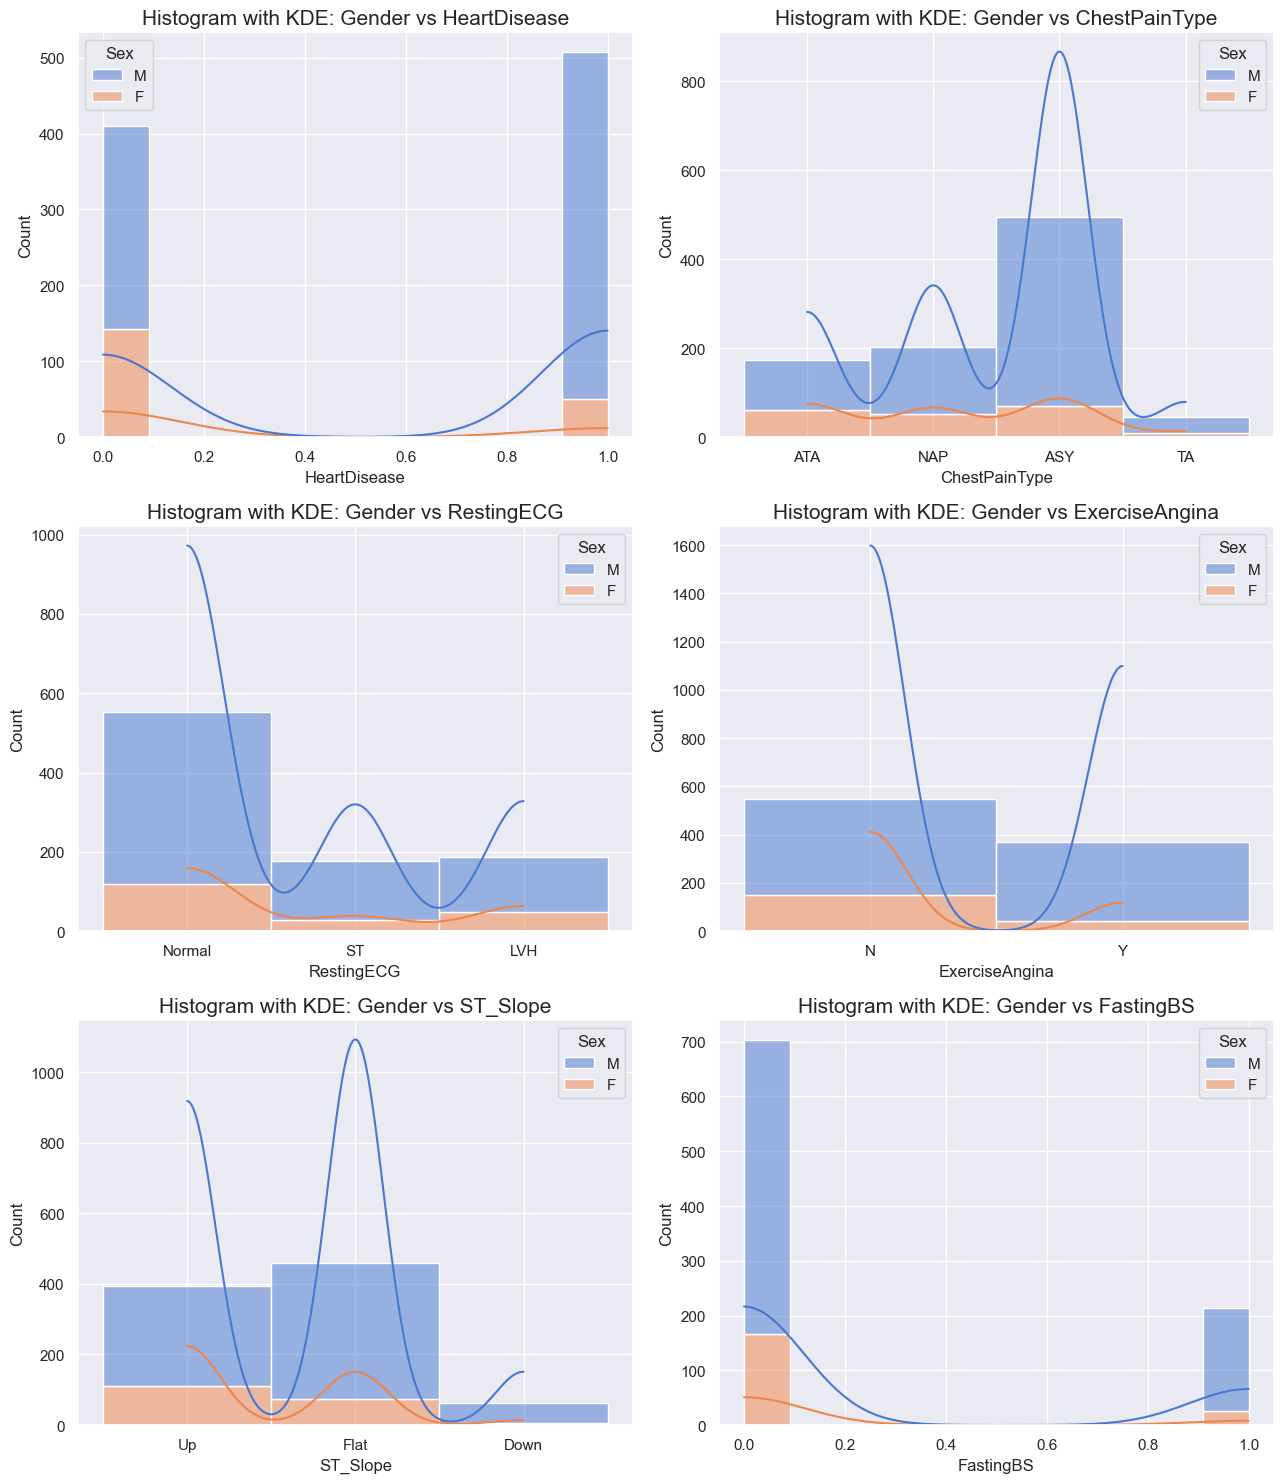

In [191]:
plt.figure(figsize=(13, 15))  # Adjust figure size as needed

# List of variables for which you want to create histogram plots
variables = ['HeartDisease', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

# Loop through the variables and create histogram plots
for i, variable in enumerate(variables, start=1):
    plt.subplot(3, 2, i)  # Adjust the subplot arrangement as needed
    sns.histplot(data=data, x=variable, hue="Sex", multiple="stack", palette="muted", kde=True)
    plt.title(f'Histogram with KDE: Gender vs {variable}', size=15)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()



**Histogram with KDE: Gender vs Heart Disease:**
- This plot compares gender (male and female) with the presence or absence of heart disease.
- The blue section represents males (M), and the orange section represents females (F).
- The vertical spread of each violin plot shows the distribution of heart disease cases (1) and no heart disease cases (0) within each gender group.

**Histogram with KDE: Gender vs Chest Pain Type:**
- This plot compares gender with different types of chest pain.
- The x-axis shows chest pain types: Atypical angina (Ata), Non-anginal pain (NAP), Typical angina (Ta), and Asymptomatic (Asy).
- The violin plots for males (M) and females (F) display the distribution of each chest pain type.

**Histogram with KDE: Gender vs Resting ECG:**
- This plot compares gender with resting electrocardiogram (ECG) results.
- The x-axis shows ECG categories: Normal, ST-T wave abnormality (ST), and Left ventricular hypertrophy (Lvh).
- The violin plots for males (M) and females (F) represent the distribution of ECG results.

**Histogram with KDE: Gender vs Exercise-Induced Angina:**
- This plot compares gender with exercise-induced angina.
- The x-axis shows angina status: No (N) and Yes (Y).
- The violin plots for males (M) and females (F) illustrate the distribution of angina cases.

**Histogram with KDE: Gender vs ST Slope:**
- This plot compares gender with ST segment slope values.
- The x-axis shows slope categories: Upward (Up), Flat (Flat), and Downward (Down).
- The violin plots for males (M) and females (F) depict the distribution of ST slope values.

**Histogram with KDE: Gender vs Fasting Blood Sugar:**
- This plot compares gender with fasting blood sugar levels.
- The x-axis shows blood sugar status: Normal (0) and Elevated (1).
- The violin plots for males (M) and females (F) show the distribution of fasting blood sugar levels.


In [192]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

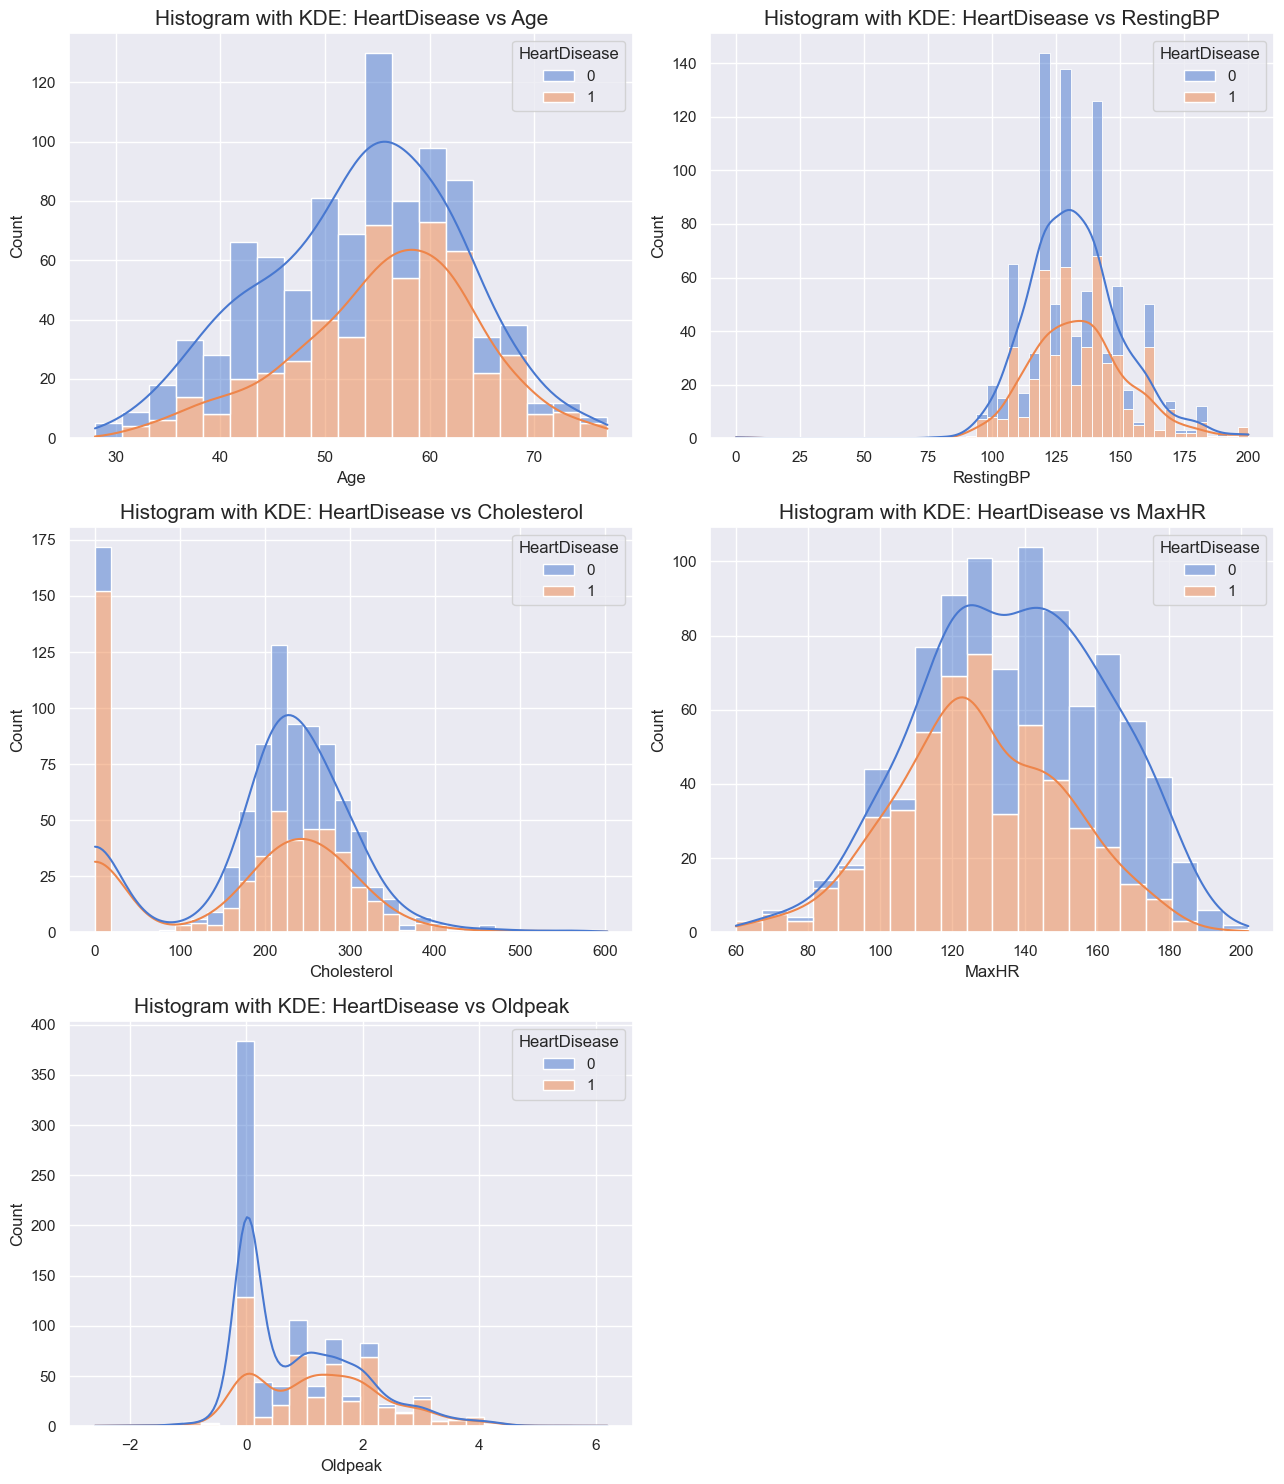

In [193]:
plt.figure(figsize=(13, 15))  # Adjust figure size as needed

# List of variables for which you want to create histogram plots
variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Loop through the variables and create histogram plots
for i, variable in enumerate(variables, start=1):
    plt.subplot(3, 2, i)  # Adjust the subplot arrangement as needed
    sns.histplot(data=data, x=variable, hue="HeartDisease", multiple="stack", palette="muted", kde=True)
    plt.title(f'Histogram with KDE: HeartDisease vs {variable}', size=15)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


**Heart Disease vs Age:**
- The distribution of heart disease cases varies with age.
- Most heart disease cases occur between the ages of 50 and 60.
- Both males and females exhibit a similar pattern in this age range.

**Heart Disease vs Resting Blood Pressure (RestingBP):**
- The resting blood pressure for both heart disease and non-heart disease groups is primarily around 120-140 mm Hg.
- There is no significant difference in resting blood pressure between males and females.

**Heart Disease vs Cholesterol:**
- Individuals with heart disease tend to have cholesterol levels around 200-260 mg/dl.
- Those without heart disease also have similar cholesterol levels, but the distribution is broader.

**Heart Disease vs Maximum Heart Rate Achieved (MaxHR):**
- People with heart disease achieve a maximum heart rate (MaxHR) of around 140 bpm during exercise.
- Those without heart disease often reach a MaxHR above 160 bpm.

**Heart Disease vs Oldpeak:**
- Most people with heart disease experience an oldpeak (ST depression induced by exercise relative to rest) of less than 2.
- Individuals without heart disease often have an oldpeak close to zero.


In [194]:
# Create a 3D scatter plot with selectable labels
fig = px.scatter_3d(data_frame=data, x='RestingBP', y='Cholesterol', z='MaxHR', color='MaxHR',
                    labels={'RestingBP': 'Resting BP', 'Cholesterol': 'Cholesterol', 'MaxHR': 'Max Heart Rate'},
                    title='3D Scatter Plot of RestingBP, Cholesterol, and MaxHR',
                    color_continuous_scale='Viridis')


fig.update_layout(width=800, height=800)
# Show the plot
fig.show()


**Axes:**
- X-Axis (Resting BP): Ranges from 0 to 200.
- Y-Axis (Cholesterol): The numerical range isn’t visible, but it represents cholesterol levels.
- Z-Axis (Max Heart Rate): Ranges from 60 to 200.

**Data Points:**
- Each point on the plot represents an individual data entry.
- The position of each point is determined by the three variables: Resting BP, Cholesterol, and MaxHR.
- The color of each point indicates the range of MaxHR values:
  - Purple: Lower MaxHR values.
  - Yellow: Higher MaxHR values.

**Clusters:**
- There are clusters of data points in various regions of the graph.
- These clusters represent different combinations of Resting BP, Cholesterol, and MaxHR.
- The overall pattern suggests relationships between these health parameters.


#### **Use SAS for Normality check**

PROC UNIVARIATE DATA= work.import NORMAL PLOT;

var Age RestingBP Cholesterol MaxHR;

RUN;

> **Age**

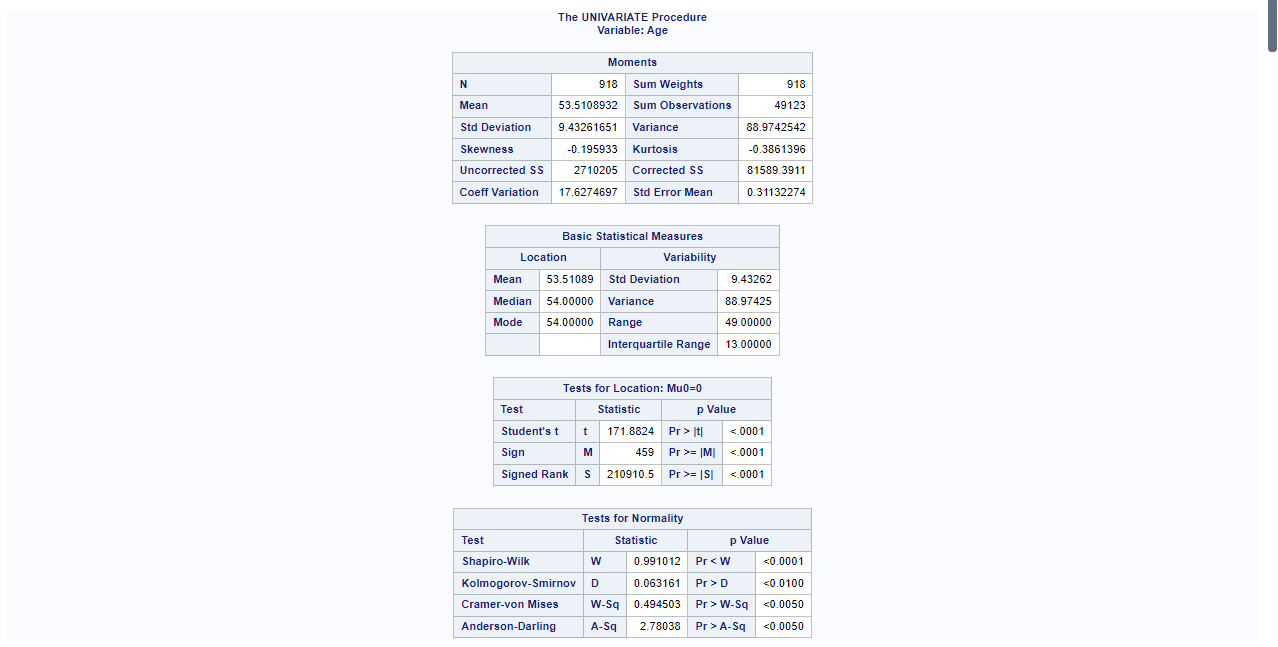

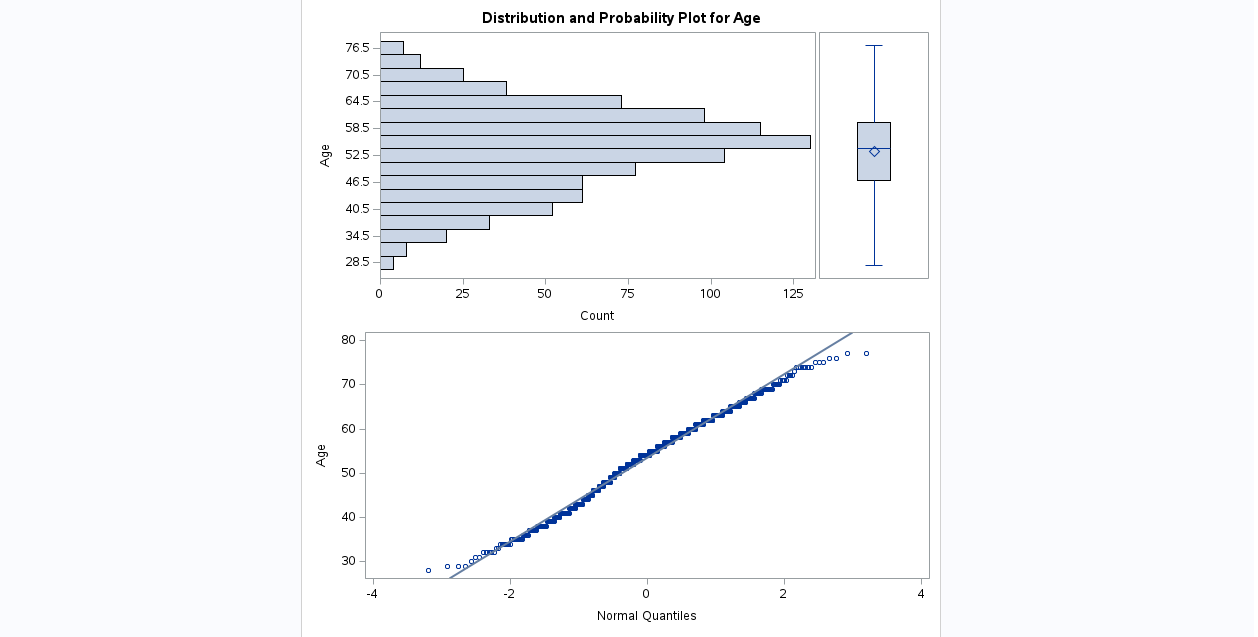

> **RestingBP**

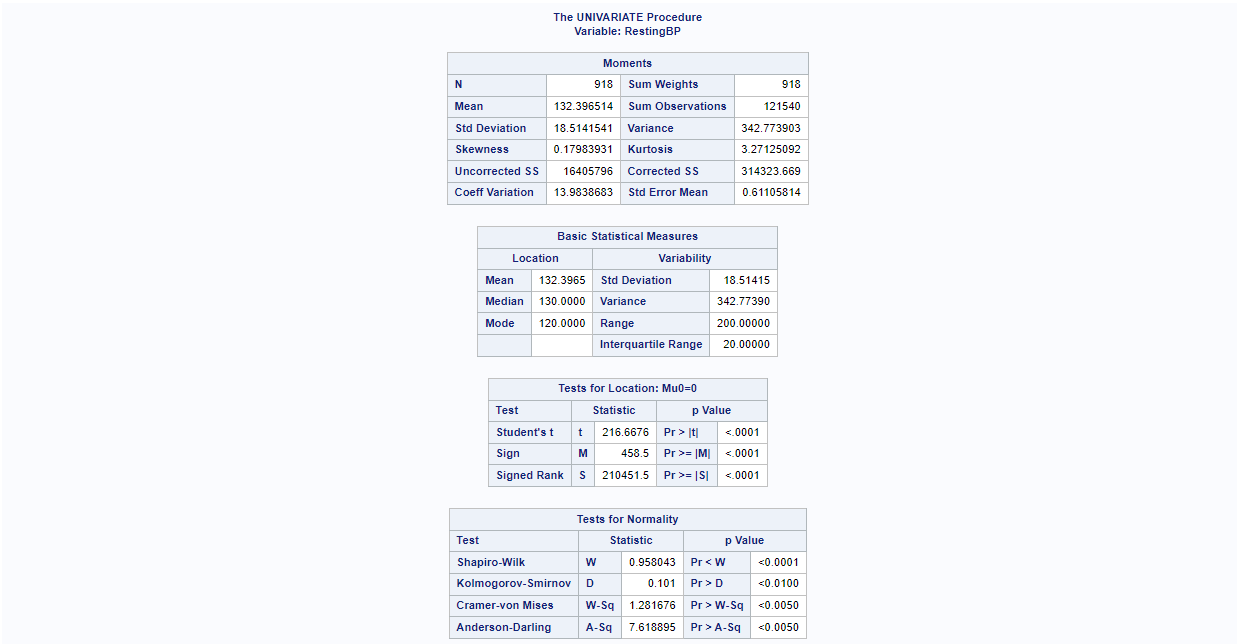

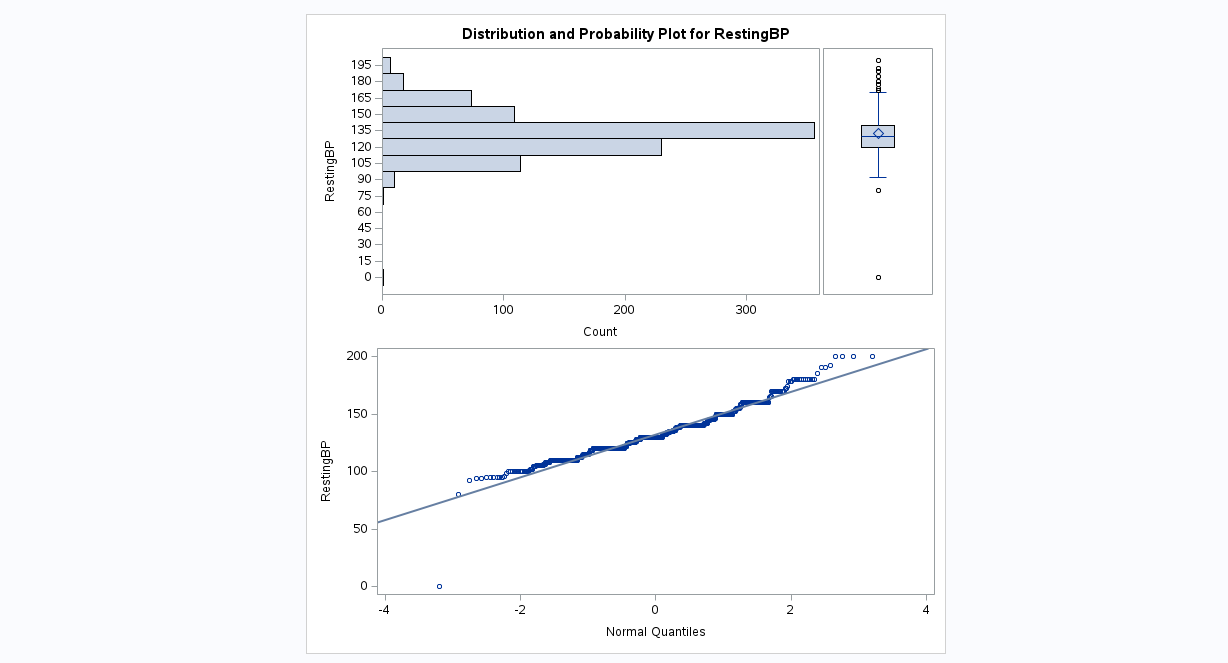

> **Cholesterol**

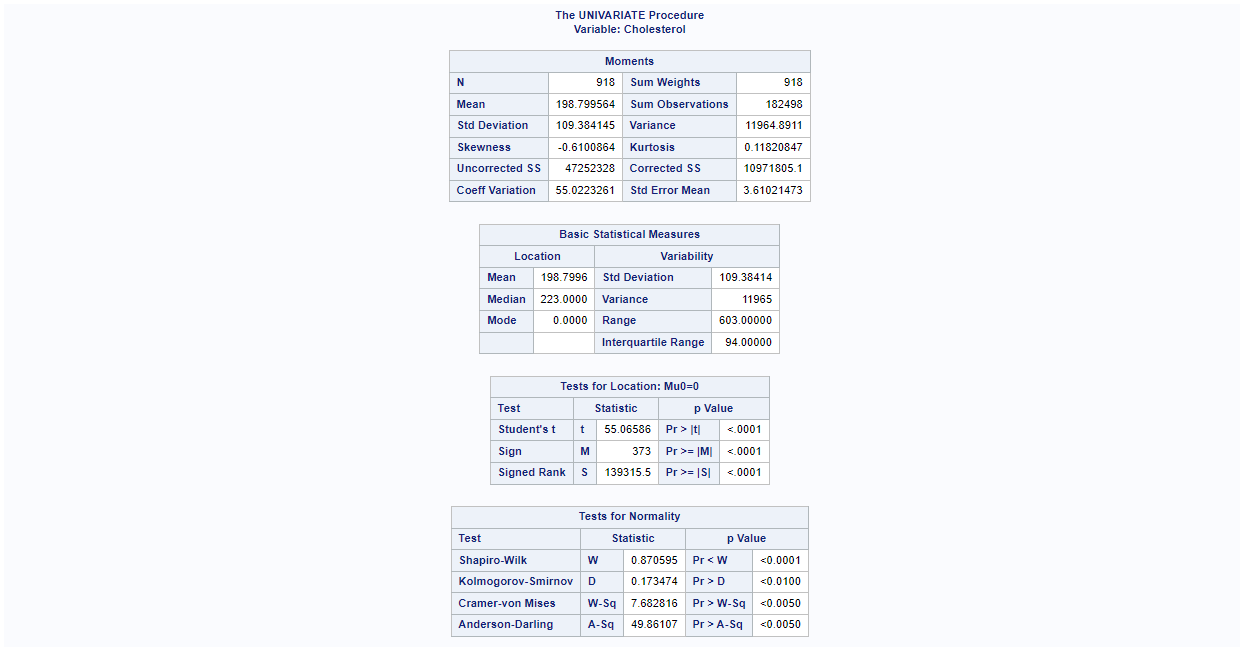

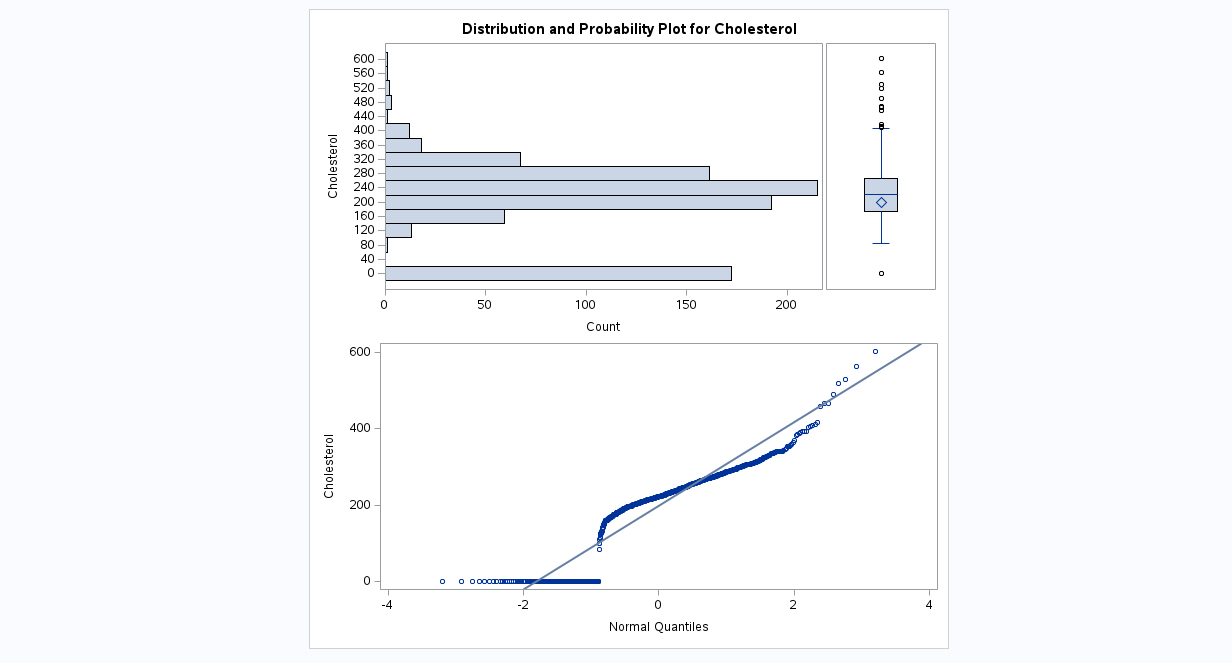

> **MaxHR**

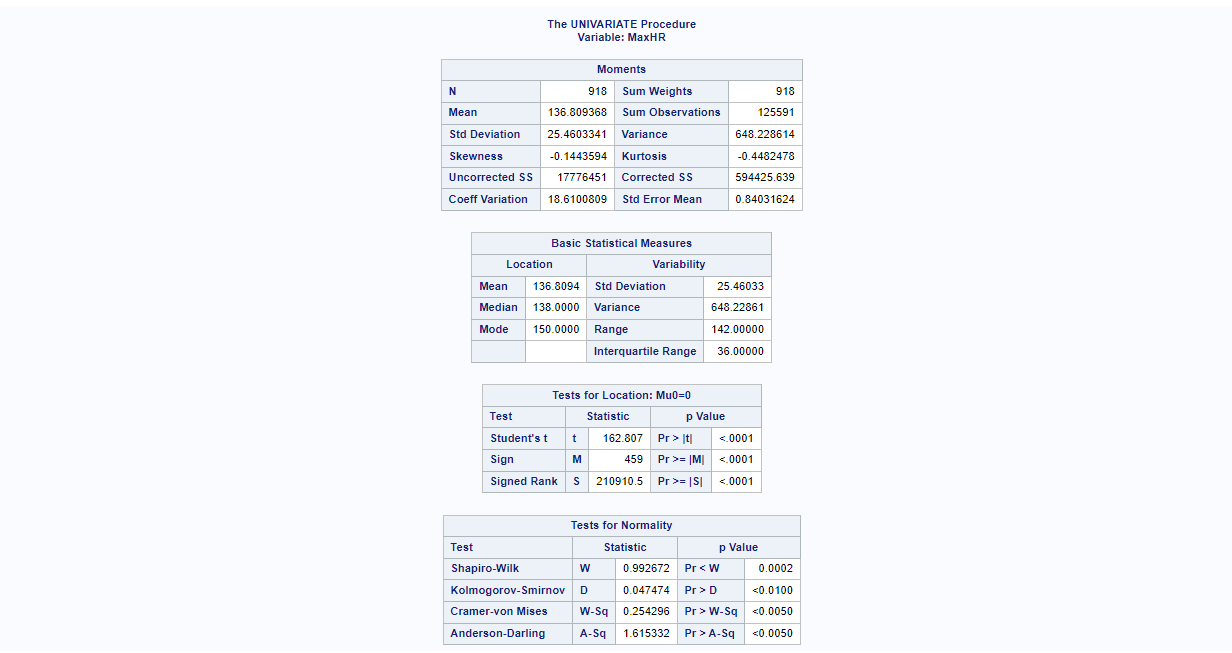

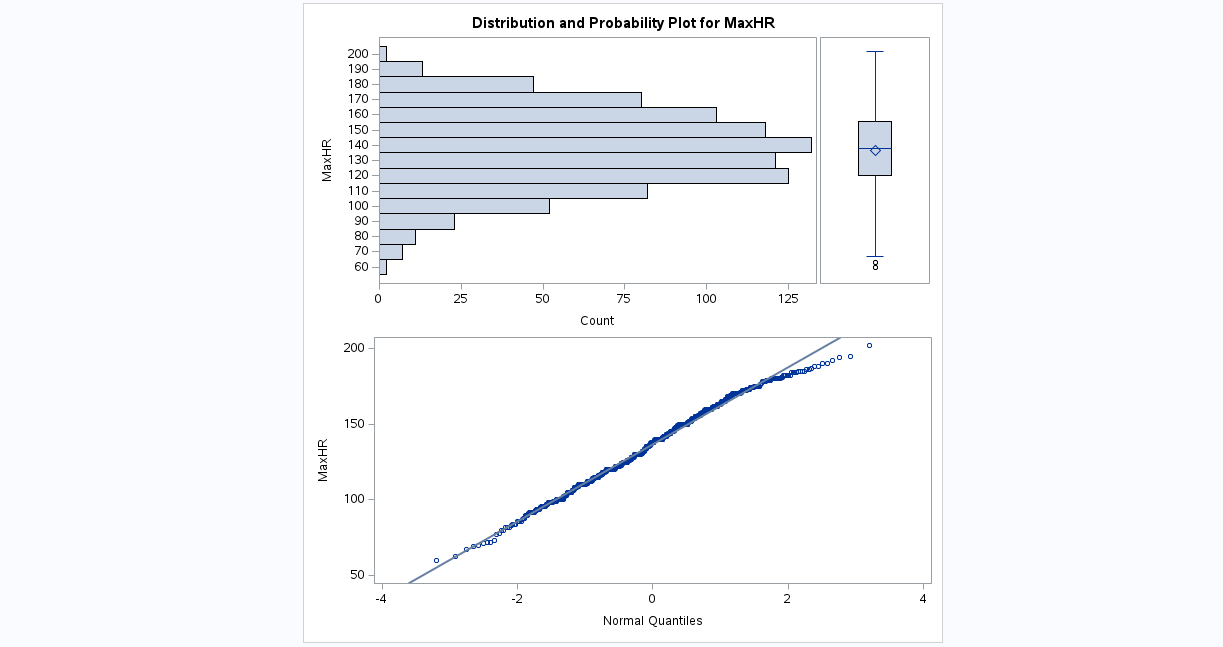

+ **It shows that all attributes have p-values less than 0.05 in the Shapiro test, indicating that all our data are normal. Additionally, since the number of data rows is 918, which is less than 2000, Shapiro-Wilk test is appropriate for checking normality.**

> **Check Outliers with the help of Boxplot**

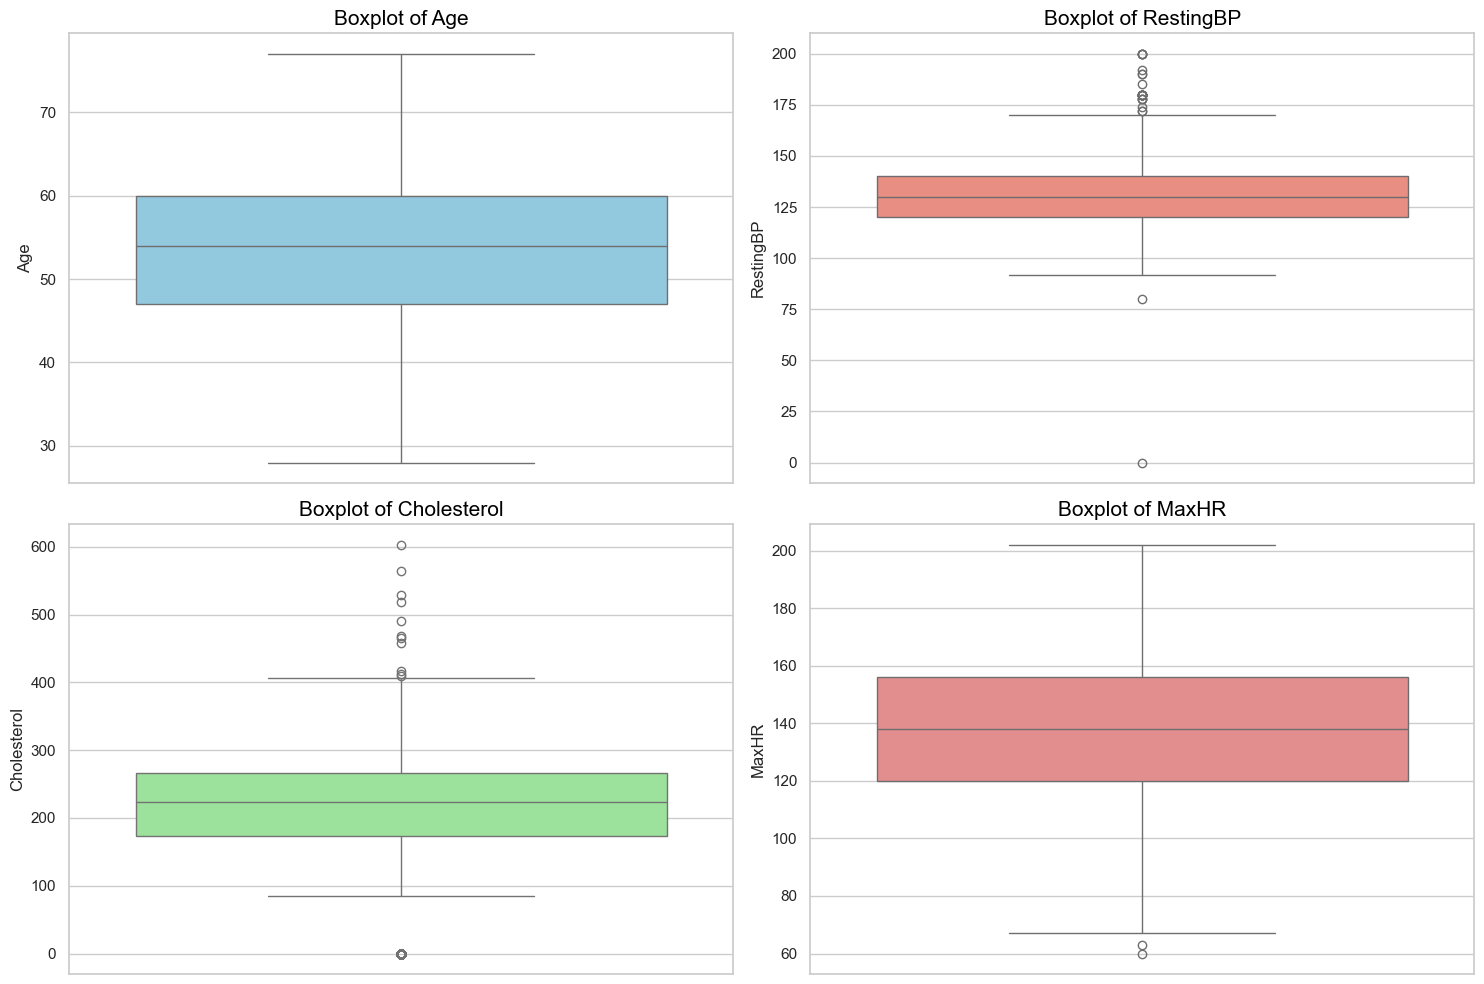

In [195]:
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

# Create a single subplot for all boxplots
ax = plt.subplot(2, 2, 1)

sns.boxplot(data=data, y="Age", color='skyblue', ax=ax)
ax.set_title("Boxplot of Age", fontsize=15, color='black')

sns.boxplot(data=data, y='RestingBP', color='salmon', ax=plt.subplot(2, 2, 2))
plt.title("Boxplot of RestingBP", fontsize=15, color='black')

sns.boxplot(data=data, y='Cholesterol', color='lightgreen', ax=plt.subplot(2, 2, 3))
plt.title("Boxplot of Cholesterol", fontsize=15, color='black')

sns.boxplot(data=data, y="MaxHR", color='lightcoral', ax=plt.subplot(2, 2, 4))
plt.title("Boxplot of MaxHR", fontsize=15, color='black')

plt.tight_layout()
plt.show()


> **In this box plot, we observe outliers in 'RestingBP', 'Cholesterol', and 'MaxHR'. However, after conducting the Shapiro-Wilk test, we found that all data are normal. Therefore, these outliers may represent valid data points that carry important information. As a result, we have chosen not to remove any outliers.**

**Pairpolt**

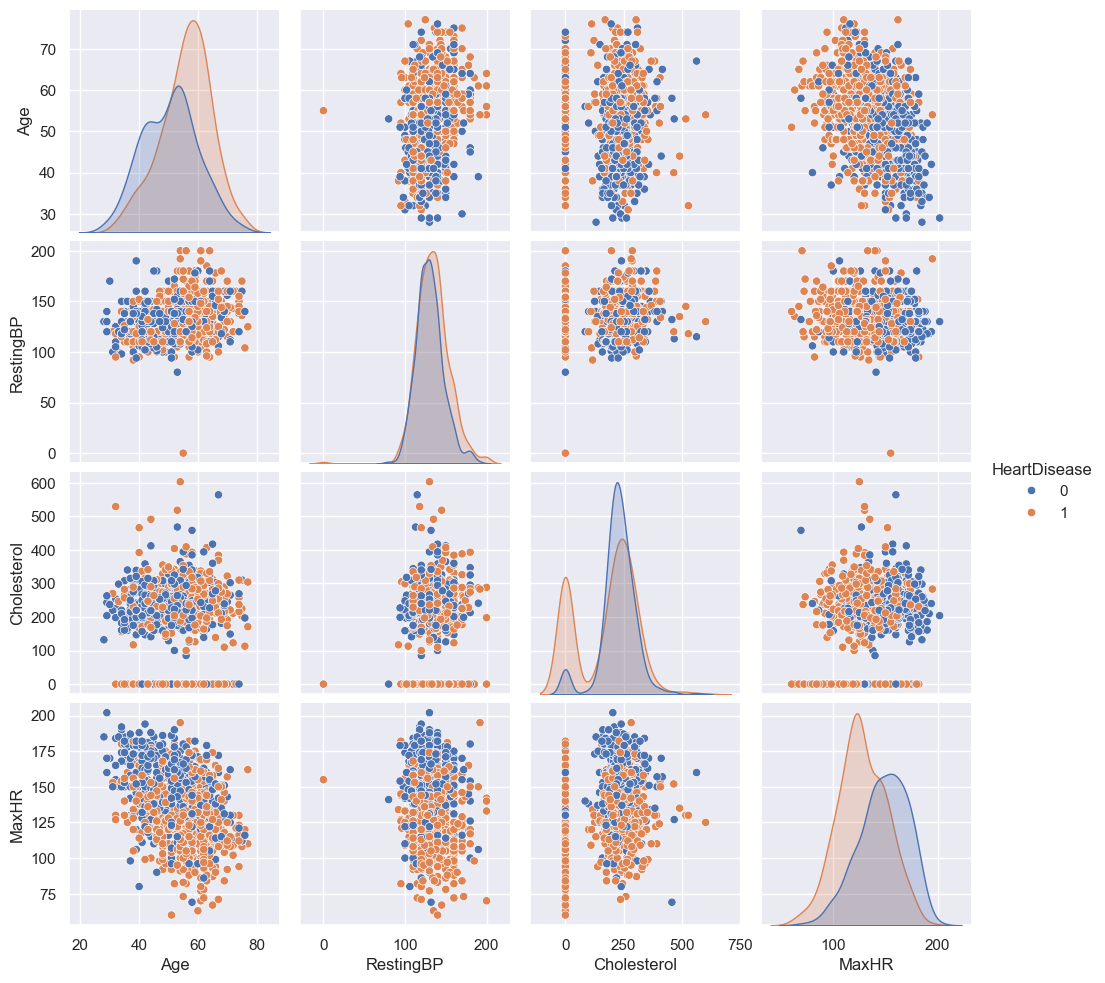

In [196]:
# Assuming 'data' is your DataFrame containing the variables
sns.set_style('darkgrid')

# Selecting the columns of interest
selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Creating the pairplot with classification based on 'HeartDisease'
sns.pairplot(data[selected_columns + ['HeartDisease']], hue='HeartDisease')

plt.show()

1. **Heart Disease vs Age:**
    - The distribution of heart disease cases varies with age.
    - Most heart disease cases occur between the ages of 50 and 60.
    - Both males and females exhibit a similar pattern in this age range.

2. **Heart Disease vs Resting Blood Pressure (RestingBP):**
    - The resting blood pressure for both heart disease and non-heart disease groups is primarily around 120-140 mm Hg.
    - There is no significant difference in resting blood pressure between males and females.

3. **Heart Disease vs Cholesterol:**
    - Individuals with heart disease tend to have cholesterol levels around 200-260 mg/dl.
    - Those without heart disease also have similar cholesterol levels, but the distribution is broader.

4. **Heart Disease vs Maximum Heart Rate Achieved (MaxHR):**
    - People with heart disease achieve a maximum heart rate (MaxHR) of around 140 bpm during exercise.
    - Those without heart disease often reach a MaxHR above 160 bpm.

5. **Heart Disease vs Oldpeak:**
    - Most people with heart disease experience an oldpeak (ST depression induced by exercise relative to rest) of less than 2.
    - Individuals without heart disease often have an oldpeak close to zero.


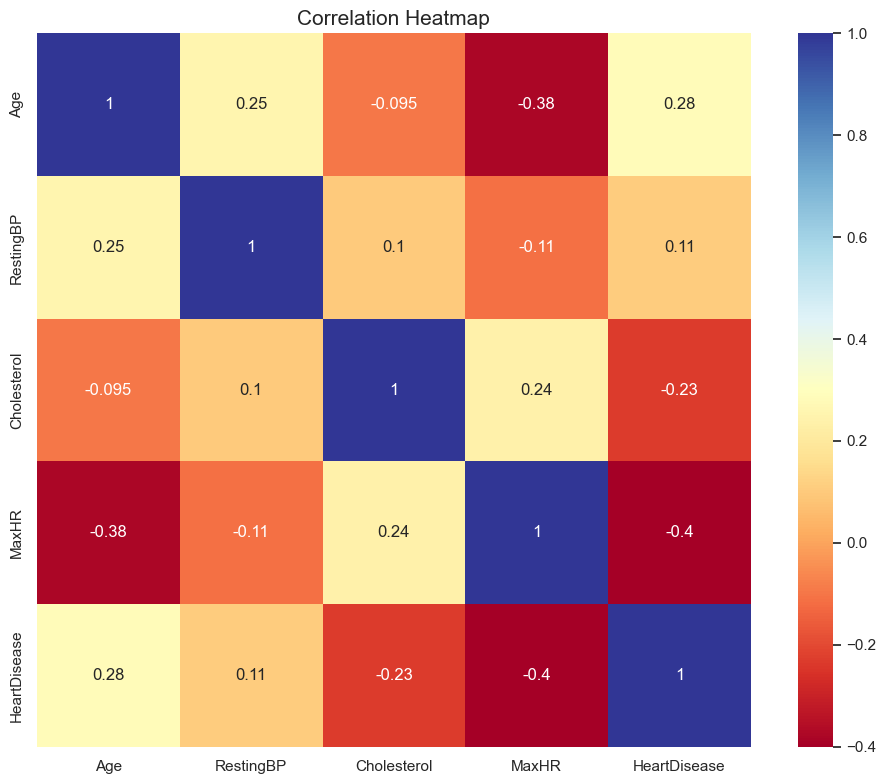

In [197]:
# Create a sample correlation heatmap
plt.figure(figsize=(10, 8))

# Selecting the columns of interest
selected_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']

# Create the heatmap with a different color scheme
sns.heatmap(data[selected_columns].corr(), annot=True, cmap='RdYlBu', square=True)

# Set title
plt.title("Correlation Heatmap", fontsize=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


> In this heatmap, HeartDisease exhibits an indirect yet relatively strong correlation with MaxHR, and a slightly weaker but still significant relationship with Cholesterol. On the other hand, RestingBP shows a neutral or slightly downward correlation. Interestingly, Age appears to have a neutral correlation with HeartDisease, but it inversely correlates with MaxHR. This suggests that Age may not have a direct relationship with HeartDisease, but MaxHR demonstrates a strong association with both Age and HeartDisease. Therefore, it indicates that all the numeric variables are useful for our model.

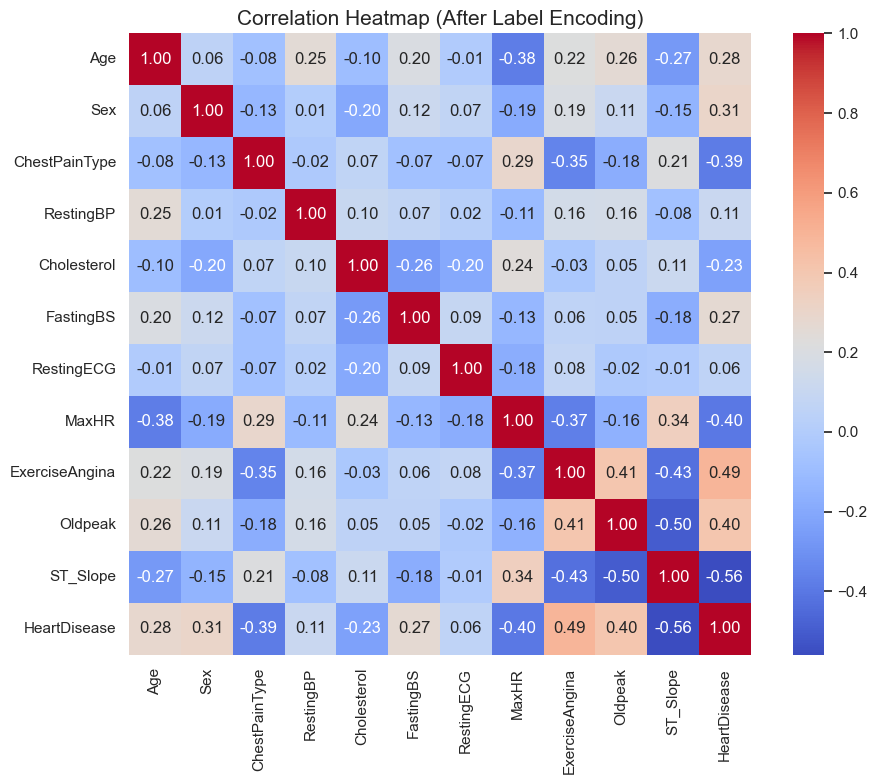

In [198]:
# Assuming 'data' is your DataFrame containing both numerical and categorical columns

# Perform label encoding for categorical variables

label_encoder = LabelEncoder()
data_encoded = data.copy()  # Create a copy of the original DataFrame

# Encode categorical variables
for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Set title
plt.title("Correlation Heatmap (After Label Encoding)", fontsize=15)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In this heatmap, our focus shifts to categorical variables that exhibit a relationship with HeartDisease.

> Variables such as ChestPainType, ExerciseAngina, and ST_Slope show discernible associations with HeartDisease. Therefore, for machine learning input variables, we prioritize these three categorical attributes, as they demonstrate significant correlations with the target variable. Conversely, for numeric variables, we include all available attributes due to their potential usefulness in predicting HeartDisease. This strategic selection ensures a comprehensive representation of both categorical and numeric features in our machine learning model, enhancing its predictive capability and interpretability.

In [199]:
data1 = data
data.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

#### **FEATURE SCALING**
> Feature scaling adjusts the range of independent variables in the dataset, ensuring that all features have a similar scale. This prevents certain features from dominating the model training process and improves the overall performance of machine learning algorithms.

+ **MinMaxScaler**
>MinMaxScaler scales features to a specified range, typically between 0 and 1, preserving the relative differences in the data's original range. It is particularly useful when the distribution of the data is not Gaussian or when the standard deviation is very small, preventing Z-score normalization.

In [200]:
# Creating object
scaler = MinMaxScaler()

# Scaling the feature 
data[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']] = scaler.fit_transform(data[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']])


### **Remove unnecessary columns.**

> Using the heatmap, select columns that are highly correlated, either positively or inversely, for further analysis. Other columns should be removed.

In [201]:
# Assuming 'data' is your DataFrame containing both numerical and categorical variables

data = data.drop(columns=['Sex','FastingBS','RestingECG','RestingBP'])

In [202]:
data.shape

(918, 8)

In [203]:
data.head(5)

Age ChestPainType  Cholesterol     MaxHR ExerciseAngina   Oldpeak  \
0  0.244898           ATA     0.479270  0.788732              N  0.295455   
1  0.428571           NAP     0.298507  0.676056              N  0.409091   
2  0.183673           ATA     0.469320  0.267606              N  0.295455   
3  0.408163           ASY     0.354892  0.338028              Y  0.465909   
4  0.530612           NAP     0.323383  0.436620              N  0.295455   

  ST_Slope  HeartDisease  
0       Up             0  
1     Flat             1  
2       Up             0  
3     Flat             1  
4       Up             0

In [204]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [205]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [206]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [207]:
data.head(5)

Age ChestPainType  Cholesterol     MaxHR ExerciseAngina   Oldpeak  \
0  0.244898           ATA     0.479270  0.788732              N  0.295455   
1  0.428571           NAP     0.298507  0.676056              N  0.409091   
2  0.183673           ATA     0.469320  0.267606              N  0.295455   
3  0.408163           ASY     0.354892  0.338028              Y  0.465909   
4  0.530612           NAP     0.323383  0.436620              N  0.295455   

  ST_Slope  HeartDisease  
0       Up             0  
1     Flat             1  
2       Up             0  
3     Flat             1  
4       Up             0

#### **Label Encoding**
> Label encoding is a technique used to convert categorical variables into numerical format, assigning a unique integer to each category. It is commonly employed in machine learning algorithms that require numerical input data, such as decision trees and random forests.

+ **get_dummies**
> The get_dummies function is a method used in pandas to convert categorical variables into dummy/indicator variables, creating binary columns for each category. This technique is particularly useful when dealing with categorical data in machine learning models that require numerical input.

In [208]:
# Perform one-hot encoding for the 'ChestPainType' column with k-1 columns
data = pd.get_dummies(data, columns=['ChestPainType'], prefix=['ChestPain'], drop_first=True)

In [209]:
data.head(5)

Age  Cholesterol     MaxHR ExerciseAngina   Oldpeak ST_Slope  \
0  0.244898     0.479270  0.788732              N  0.295455       Up   
1  0.428571     0.298507  0.676056              N  0.409091     Flat   
2  0.183673     0.469320  0.267606              N  0.295455       Up   
3  0.408163     0.354892  0.338028              Y  0.465909     Flat   
4  0.530612     0.323383  0.436620              N  0.295455       Up   

   HeartDisease  ChestPain_ATA  ChestPain_NAP  ChestPain_TA  
0             0           True          False         False  
1             1          False           True         False  
2             0           True          False         False  
3             1          False          False         False  
4             0          False           True         False

**ORDINAL ENCODER:**
> Ordinal Encoder is a preprocessing technique that assigns a unique integer to each category of a categorical variable based on the specified order. It is commonly used when the categorical variables have an inherent order or hierarchy, such as low, medium, and high.

In [210]:
# Subset the DataFrame with the categorical columns
categorical_data = data[['ExerciseAngina', 'ST_Slope','ChestPain_ATA','ChestPain_NAP','ChestPain_TA']]

# Initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the ordinal encoder on the categorical data
categorical_data_encoded = ordinal_encoder.fit_transform(categorical_data)

# Replace the original categorical columns with the encoded values
data[['ExerciseAngina', 'ST_Slope','ChestPain_ATA','ChestPain_NAP','ChestPain_TA']] = categorical_data_encoded

In [211]:
data.head(5)

Age  Cholesterol     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  \
0  0.244898     0.479270  0.788732             0.0  0.295455       2.0   
1  0.428571     0.298507  0.676056             0.0  0.409091       1.0   
2  0.183673     0.469320  0.267606             0.0  0.295455       2.0   
3  0.408163     0.354892  0.338028             1.0  0.465909       1.0   
4  0.530612     0.323383  0.436620             0.0  0.295455       2.0   

   HeartDisease  ChestPain_ATA  ChestPain_NAP  ChestPain_TA  
0             0            1.0            0.0           0.0  
1             1            0.0            1.0           0.0  
2             0            1.0            0.0           0.0  
3             1            0.0            0.0           0.0  
4             0            0.0            1.0           0.0

#### **Training And Testing Sets For Machine Learning**

>In machine learning, training and testing sets are subsets of data used to train and evaluate models, respectively. The training set is used to teach the model patterns and relationships in the data, while the testing set is used to assess the model's performance and generalization to unseen data.

In [212]:
y = data[['HeartDisease']] # Depended
x = data[['Age','Cholesterol','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','ChestPain_ATA','ChestPain_NAP','ChestPain_TA']] # independent

In [213]:
y.value_counts()

HeartDisease
1               508
0               410
Name: count, dtype: int64

In [214]:
x.head(2)

Age  Cholesterol     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  \
0  0.244898     0.479270  0.788732             0.0  0.295455       2.0   
1  0.428571     0.298507  0.676056             0.0  0.409091       1.0   

   ChestPain_ATA  ChestPain_NAP  ChestPain_TA  
0            1.0            0.0           0.0  
1            0.0            1.0           0.0

>   **It shows that our data is balance**

#### **Split data into Training and Testing**

> Utilizing a 70-30 split, the dataset is partitioned into a training set, comprising 70% of the data, and a testing set, encompassing 30% of the data. This division allows for model training on a majority of the data while ensuring robust evaluation on unseen samples.

In [215]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [216]:
print('Length of Training Set :',len(x_train))
print('Length of Testing Set :',len(x_test))

Length of Training Set : 642
Length of Testing Set : 276


### **Model Selection: Parametric vs. Non-parametric Approaches**

In this analysis, we conduct both parametric and non-parametric modeling techniques on the dataset. Despite the Shapiro test indicating normality, boxplots reveal the presence of outliers. Additionally, considering the presence of categorical variables, both modeling approaches are explored to evaluate accuracy. The model with superior performance will be selected for future deployment.

##### **Parametric**

1. **Logistic Regression** : Logistic Regression is a classic classification algorithm used to predict the probability of a binary outcome. In heart disease classification, it estimates the likelihood of a patient having heart disease based on input features.

2. **Gaussian Naive Bayes** : Gaussian Naive Bayes is a probabilistic classifier assuming Gaussian distribution of features. It's suitable for continuous-valued features like blood pressure in heart disease prediction.

3. **Bernoulli Naive Bayes** : Bernoulli Naive Bayes is a variant assuming binary-valued features. It's useful for binary features such as smoking habits or family history of heart disease.

4. **Quadratic Discriminant Analysis (QDA)** : QDA models the conditional probability density function of features for each class, allowing for more flexible decision boundaries. It can capture non-linear relationships in heart disease data, potentially offering better classification performance.


In [217]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_train_pred = logistic_model.predict(x_train)
train_accuracy_logistic = accuracy_score(y_train, y_train_pred)
y_test_pred = logistic_model.predict(x_test)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred)
r2_logistic = r2_score(y_test, y_test_pred)
n = len(y_test)
p = x_test.shape[1]
adj_r2_logistic = 1 - (1 - r2_logistic) * (n - 1) / (n - p - 1)
print("Logistic Regression:")
print("Training Accuracy:", train_accuracy_logistic)
print("Testing Accuracy:", test_accuracy_logistic)
print("R-squared:", r2_logistic)
print("Adjusted R-squared:", adj_r2_logistic)

# Quadratic Discriminant Analysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, y_train)
y_train_pred = qda_model.predict(x_train)
train_accuracy_qda = accuracy_score(y_train, y_train_pred)
y_test_pred = qda_model.predict(x_test)
test_accuracy_qda = accuracy_score(y_test, y_test_pred)
r2_qda = r2_score(y_test, y_test_pred)
adj_r2_qda = 1 - (1 - r2_qda) * (n - 1) / (n - p - 1)
print("\nQuadratic Discriminant Analysis:")
print("Training Accuracy:", train_accuracy_qda)
print("Testing Accuracy:", test_accuracy_qda)
print("R-squared:", r2_qda)
print("Adjusted R-squared:", adj_r2_qda)

# Gaussian Naive Bayes
gaussian_model = GaussianNB()
gaussian_model.fit(x_train, y_train)
y_train_pred = gaussian_model.predict(x_train)
train_accuracy_gaussian = accuracy_score(y_train, y_train_pred)
y_test_pred = gaussian_model.predict(x_test)
test_accuracy_gaussian = accuracy_score(y_test, y_test_pred)
r2_gaussian = r2_score(y_test, y_test_pred)
adj_r2_gaussian = 1 - (1 - r2_gaussian) * (n - 1) / (n - p - 1)
print("\nGaussian Naive Bayes:")
print("Training Accuracy:", train_accuracy_gaussian)
print("Testing Accuracy:", test_accuracy_gaussian)
print("R-squared:", r2_gaussian)
print("Adjusted R-squared:", adj_r2_gaussian)

# Bernoulli Naive Bayes
bernoulli_model = BernoulliNB()
bernoulli_model.fit(x_train, y_train)
y_train_pred = bernoulli_model.predict(x_train)
train_accuracy_bernoulli = accuracy_score(y_train, y_train_pred)
y_test_pred = bernoulli_model.predict(x_test)
test_accuracy_bernoulli = accuracy_score(y_test, y_test_pred)
r2_bernoulli = r2_score(y_test, y_test_pred)
adj_r2_bernoulli = 1 - (1 - r2_bernoulli) * (n - 1) / (n - p - 1)
print("\nBernoulli Naive Bayes:")
print("Training Accuracy:", train_accuracy_bernoulli)
print("Testing Accuracy:", test_accuracy_bernoulli)
print("R-squared:", r2_bernoulli)
print("Adjusted R-squared:", adj_r2_bernoulli)


Logistic Regression:
Training Accuracy: 0.8364485981308412
Testing Accuracy: 0.855072463768116
R-squared: 0.39895470383275244
Adjusted R-squared: 0.3786185847894997

Quadratic Discriminant Analysis:
Training Accuracy: 0.8364485981308412
Testing Accuracy: 0.8804347826086957
R-squared: 0.5041376306620208
Adjusted R-squared: 0.48736033245133725

Gaussian Naive Bayes:
Training Accuracy: 0.8333333333333334
Testing Accuracy: 0.8623188405797102
R-squared: 0.42900696864111487
Adjusted R-squared: 0.40968765555002473

Bernoulli Naive Bayes:
Training Accuracy: 0.7912772585669782
Testing Accuracy: 0.8043478260869565
R-squared: 0.18858885017421578
Adjusted R-squared: 0.16113508946582455


Logistic Regression demonstrates a reasonable performance with training and testing accuracies hovering around 83.6% and 85.5%, respectively. However, upon examining the R-squared and adjusted R-squared values, it becomes evident that the model may not be capturing a substantial portion of the variability in heart disease prediction, as these metrics stand at approximately 39.9% and 37.9%, respectively. This discrepancy suggests that the selected features might not be entirely relevant to the target variable, limiting the model's predictive capabilities.

Quadratic Discriminant Analysis (QDA) showcases slightly improved accuracy metrics compared to Logistic Regression, boasting training and testing accuracies of about 83.6% and 88%, respectively. Additionally, its R-squared and adjusted R-squared values, hovering around 50.4% and 48.7%, suggest a better fit to the data compared to Logistic Regression. This indicates that QDA may capture a more significant portion of the variability in heart disease prediction, potentially due to its ability to model non-linear relationships between features and the target variable.

Gaussian Naive Bayes maintains comparable performance to Logistic Regression, achieving training and testing accuracies of approximately 83.3% and 86.2%, respectively. However, its R-squared and adjusted R-squared values are akin to those of Logistic Regression, indicating a similar limitation in explaining the variance in heart disease prediction. This suggests that Gaussian Naive Bayes may also struggle to capture the underlying patterns in the data effectively.

Bernoulli Naive Bayes, in contrast, exhibits lower accuracy rates, with training and testing accuracies around 79.1% and 80.4%, respectively. Moreover, its R-squared and adjusted R-squared values are notably lower than those of the other models, standing at approximately 18.9% and 16.1%, respectively. This substantial disparity suggests that Bernoulli Naive Bayes may not be adequately capturing the relationships between the selected features and heart disease, indicating a potential lack of relevance in the chosen feature set.

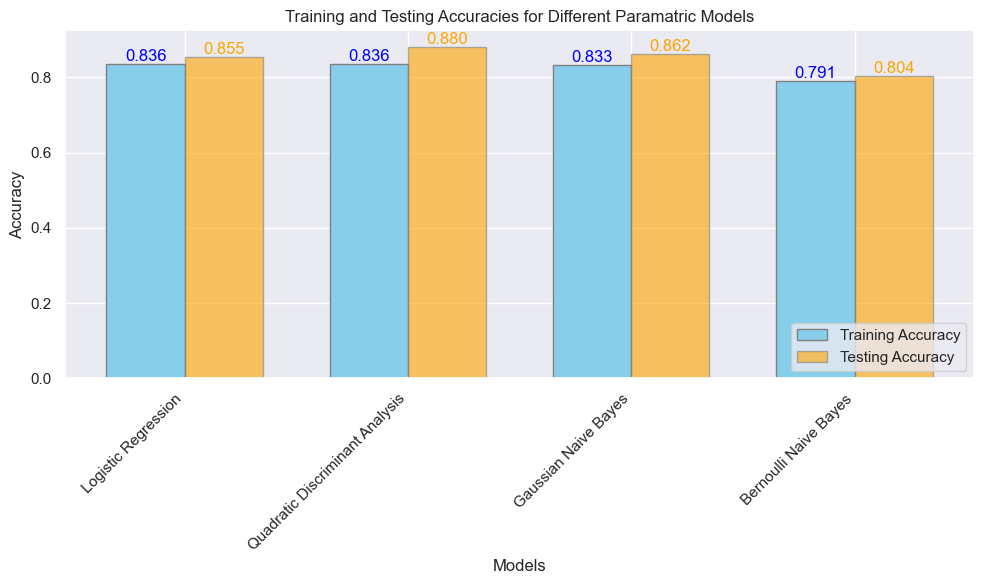

In [218]:
# Model names
models = ['Logistic Regression', 'Quadratic Discriminant Analysis', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes']

# Training and testing accuracies
train_accuracies = [train_accuracy_logistic, train_accuracy_qda, train_accuracy_gaussian, train_accuracy_bernoulli]
test_accuracies = [test_accuracy_logistic, test_accuracy_qda, test_accuracy_gaussian, test_accuracy_bernoulli]

# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
r = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(r, train_accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r + bar_width, test_accuracies, color='orange', width=bar_width, edgecolor='grey', alpha=0.6, label='Testing Accuracy')

# Add accuracy values on bars
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i, train_acc, f'{train_acc:.3f}', ha='center', va='bottom', color='blue')
    plt.text(i + bar_width, test_acc, f'{test_acc:.3f}', ha='center', va='bottom', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for Different Paramatric Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


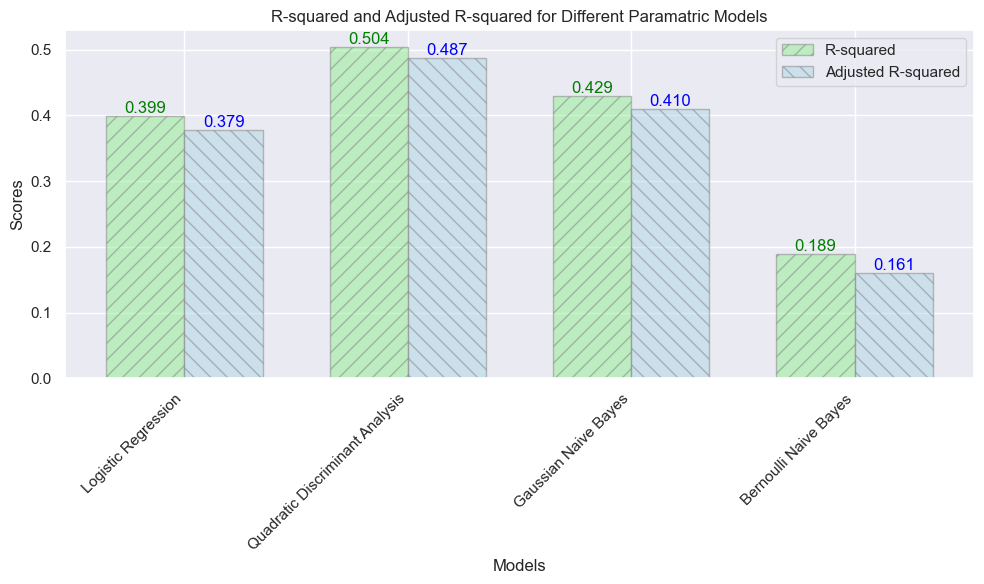

In [219]:
# Model names
models = ['Logistic Regression', 'Quadratic Discriminant Analysis', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes']

# R-squared and adjusted R-squared scores
r2_scores = [r2_logistic, r2_qda, r2_gaussian, r2_bernoulli]
adj_r2_scores = [adj_r2_logistic, adj_r2_qda, adj_r2_gaussian, adj_r2_bernoulli]

# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
r = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot R-squared and adjusted R-squared scores
plt.bar(r, r2_scores, color='lightgreen', width=bar_width, edgecolor='grey', label='R-squared', hatch='//', alpha=0.5)
plt.bar(r + bar_width, adj_r2_scores, color='lightblue', width=bar_width, edgecolor='grey', label='Adjusted R-squared', hatch='\\\\', alpha=0.5)

# Add R-squared values on bars
for i, (r2, adj_r2) in enumerate(zip(r2_scores, adj_r2_scores)):
    plt.text(i, r2, f'{r2:.3f}', ha='center', va='bottom', color='green')
    plt.text(i + bar_width, adj_r2, f'{adj_r2:.3f}', ha='center', va='bottom', color='blue')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('R-squared and Adjusted R-squared for Different Paramatric Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


> In assessing the performance of various classification models for predicting heart disease, it's evident that some models exhibit high accuracy scores on both training and testing datasets. However, upon closer examination of the R-squared and adjusted R-squared values, it becomes apparent that these accuracy metrics alone may not fully capture the relevance of the input features to the target variable. While models like Logistic Regression and Quadratic Discriminant Analysis demonstrate respectable accuracy rates of around 83-88%, their R-squared values hover around 0.40-0.50, suggesting that only a moderate portion of the variance in heart disease prediction is explained by the chosen features. This indicates that some of the input variables may not be sufficiently relevant to the target outcome, potentially leading to overfitting or underperformance when applied to new data. Therefore, further feature selection or engineering processes may be necessary to enhance the models' predictive power and generalizability.

##### **Non Paramatric Model**
Non-parametric models are characterized by their ability to make minimal assumptions about the underlying data distribution.

1. **Decision Tree:** Decision Trees recursively split the dataset based on feature values to create a tree-like structure. In heart disease classification, decision trees can identify important features like cholesterol levels or age ranges, making them interpretable and suitable for understanding risk factors.

2. **Random Forest:** Random Forest is an ensemble of decision trees that aggregates predictions from multiple trees to improve accuracy and reduce overfitting. In heart disease classification, Random Forest can handle complex interactions between features and provide robust predictions by combining diverse decision trees.

3. **Support Vector Classifier (SVC):** SVC finds the hyperplane that best separates different classes by maximizing the margin between them. In heart disease classification, SVC can effectively delineate between patients with and without heart disease by identifying optimal decision boundaries in high-dimensional feature spaces.

4. **K-Nearest Neighbors (KNN):** KNN classifies data points based on the majority class among their k nearest neighbors. In heart disease classification, KNN identifies patients with similar feature patterns and predicts their class based on the class distribution among their neighbors, making it suitable for identifying groups with similar risk profiles.

In [220]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_train_pred_dt = dt_model.predict(x_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
y_test_pred_dt = dt_model.predict(x_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
r2_dt = r2_score(y_test, y_test_pred_dt)
adj_r2_dt = 1 - (1 - r2_dt) * (n - 1) / (n - p - 1)
print("\nDecision Tree:")
print("Training Accuracy:", train_accuracy_dt)
print("Testing Accuracy:", test_accuracy_dt)
print("R-squared:", r2_dt)
print("Adjusted R-squared:", adj_r2_dt)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_train_pred_rf = rf_model.predict(x_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
y_test_pred_rf = rf_model.predict(x_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)
print("\nRandom Forest:")
print("Training Accuracy:", train_accuracy_rf)
print("Testing Accuracy:", test_accuracy_rf)
print("R-squared:", r2_rf)
print("Adjusted R-squared:", adj_r2_rf)

# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_train_pred_svc = svc_model.predict(x_train)
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
y_test_pred_svc = svc_model.predict(x_test)
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
r2_svc = r2_score(y_test, y_test_pred_svc)
adj_r2_svc = 1 - (1 - r2_svc) * (n - 1) / (n - p - 1)
print("\nSupport Vector Classifier:")
print("Training Accuracy:", train_accuracy_svc)
print("Testing Accuracy:", test_accuracy_svc)
print("R-squared:", r2_svc)
print("Adjusted R-squared:", adj_r2_svc)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_train_pred_knn = knn_model.predict(x_train)
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
y_test_pred_knn = knn_model.predict(x_test)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
r2_knn = r2_score(y_test, y_test_pred_knn)
adj_r2_knn = 1 - (1 - r2_knn) * (n - 1) / (n - p - 1)
print("\nK-Nearest Neighbors:")
print("Training Accuracy:", train_accuracy_knn)
print("Testing Accuracy:", test_accuracy_knn)
print("R-squared:", r2_knn)
print("Adjusted R-squared:", adj_r2_knn)



Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 0.7717391304347826
R-squared: 0.053353658536585136
Adjusted R-squared: 0.02132427104346213

Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.8333333333333334
R-squared: 0.3087979094076654
Adjusted R-squared: 0.2854113725079247

Support Vector Classifier:
Training Accuracy: 0.838006230529595
Testing Accuracy: 0.8297101449275363
R-squared: 0.2937717770034841
Adjusted R-squared: 0.2698768371276621

K-Nearest Neighbors:
Training Accuracy: 0.8940809968847352
Testing Accuracy: 0.8478260869565217
R-squared: 0.3689024390243901
Adjusted R-squared: 0.3475495140289747


1. **Decision Tree:** Achieves perfect training accuracy but lower testing accuracy, suggesting potential overfitting. The R-squared and adjusted R-squared values indicate that the model may not capture the full variability in the target variable.

2. **Random Forest:** Demonstrates high training accuracy with improved testing performance compared to the Decision Tree model. However, the R-squared and adjusted R-squared values suggest that the selected features may not fully explain the variability in the target variable.

3. **Support Vector Classifier:** Shows moderate training and testing accuracies, indicating a reasonable generalization capability. However, the R-squared and adjusted R-squared values imply that the model may not adequately capture the underlying patterns in the data.

4. **K-Nearest Neighbors:** Achieves good training and testing accuracies, suggesting effective classification performance. Despite this, the R-squared and adjusted R-squared values reveal that the model's selected features may not entirely explain the variability in the target variable.

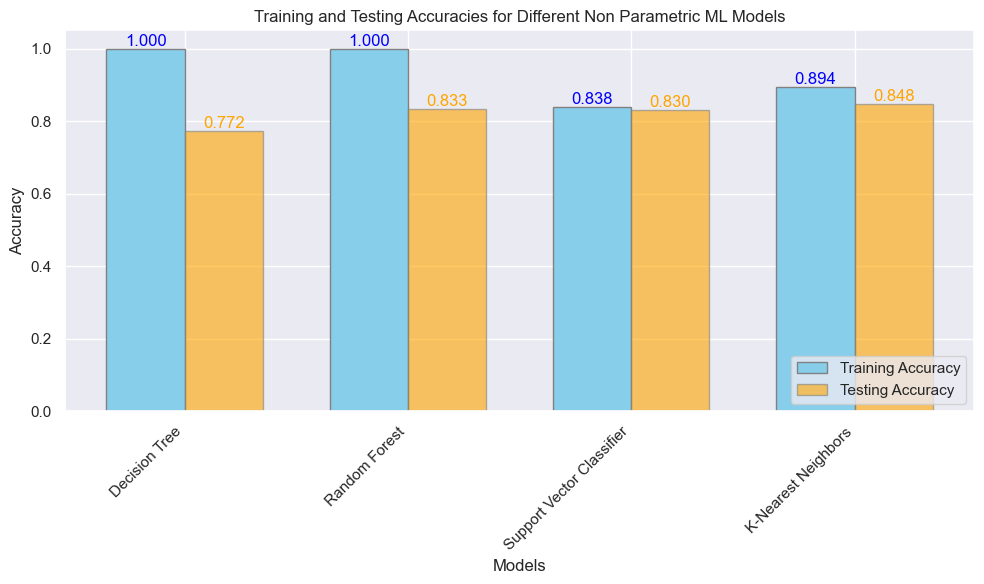

In [221]:
# Model names
models = ['Decision Tree', 'Random Forest', 'Support Vector Classifier', 'K-Nearest Neighbors']

# Training and testing scores
train_accuracies = [train_accuracy_dt, train_accuracy_rf, train_accuracy_svc, train_accuracy_knn]
test_accuracies = [test_accuracy_dt, test_accuracy_rf, test_accuracy_svc, test_accuracy_knn]

# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
r = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(r, train_accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r + bar_width, test_accuracies, color='orange', width=bar_width, edgecolor='grey', alpha=0.6, label='Testing Accuracy')

# Add accuracy values on bars
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i, train_acc, f'{train_acc:.3f}', ha='center', va='bottom', color='blue')
    plt.text(i + bar_width, test_acc, f'{test_acc:.3f}', ha='center', va='bottom', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for Different Non Parametric ML Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


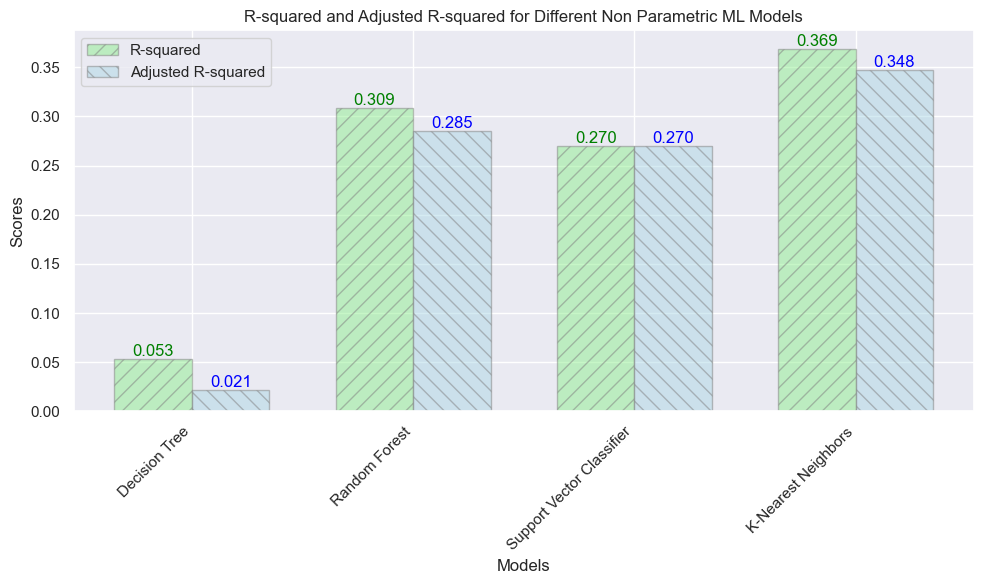

In [222]:
# Model names
models = ['Decision Tree', 'Random Forest', 'Support Vector Classifier', 'K-Nearest Neighbors']

# R-squared and adjusted R-squared scores
r2_scores = [r2_dt, r2_rf, adj_r2_svc, r2_knn]
adj_r2_scores = [adj_r2_dt, adj_r2_rf, adj_r2_svc, adj_r2_knn]


# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
r = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot R-squared and adjusted R-squared scores
plt.bar(r, r2_scores, color='lightgreen', width=bar_width, edgecolor='grey', label='R-squared', hatch='//', alpha=0.5)
plt.bar(r + bar_width, adj_r2_scores, color='lightblue', width=bar_width, edgecolor='grey', label='Adjusted R-squared', hatch='\\\\', alpha=0.5)

# Add R-squared values on bars
for i, (r2, adj_r2) in enumerate(zip(r2_scores, adj_r2_scores)):
    plt.text(i, r2, f'{r2:.3f}', ha='center', va='bottom', color='green')
    plt.text(i + bar_width, adj_r2, f'{adj_r2:.3f}', ha='center', va='bottom', color='blue')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('R-squared and Adjusted R-squared for Different Non Parametric ML Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


> The decision tree model exhibits perfect training accuracy but lower testing accuracy, suggesting potential overfitting. Random Forest and Support Vector Classifier demonstrate moderate training accuracies with improved testing performance, indicating the model's ability to generalize well. However, the relatively low R-squared and adjusted R-squared values across all models indicate that the selected attributes may not fully explain the variability in the target variable.

#### **Part 2** 
> **Improve Accuracy & Feature Selection Problem**

In [223]:
data = data1

In [224]:
data.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0  0.244898   M           ATA       0.70     0.479270          0     Normal   
1  0.428571   F           NAP       0.80     0.298507          0     Normal   
2  0.183673   M           ATA       0.65     0.469320          0         ST   
3  0.408163   F           ASY       0.69     0.354892          0     Normal   
4  0.530612   M           NAP       0.75     0.323383          0     Normal   

      MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0  0.788732              N  0.295455       Up             0  
1  0.676056              N  0.409091     Flat             1  
2  0.267606              N  0.295455       Up             0  
3  0.338028              Y  0.465909     Flat             1  
4  0.436620              N  0.295455       Up             0

### **Label Encoding**

> **get_dummies**

In [225]:
# Perform one-hot encoding for the 'ChestPainType' column with k-1 columns
data = pd.get_dummies(data, columns=['ChestPainType'], prefix=['ChestPain'], drop_first=True)

In [226]:
data.head(5)

Age Sex  RestingBP  Cholesterol  FastingBS RestingECG     MaxHR  \
0  0.244898   M       0.70     0.479270          0     Normal  0.788732   
1  0.428571   F       0.80     0.298507          0     Normal  0.676056   
2  0.183673   M       0.65     0.469320          0         ST  0.267606   
3  0.408163   F       0.69     0.354892          0     Normal  0.338028   
4  0.530612   M       0.75     0.323383          0     Normal  0.436620   

  ExerciseAngina   Oldpeak ST_Slope  HeartDisease  ChestPain_ATA  \
0              N  0.295455       Up             0           True   
1              N  0.409091     Flat             1          False   
2              N  0.295455       Up             0           True   
3              Y  0.465909     Flat             1          False   
4              N  0.295455       Up             0          False   

   ChestPain_NAP  ChestPain_TA  
0          False         False  
1           True         False  
2          False         False  
3          False         False  
4           True         False

> Ordinal Encoder

In [227]:
# Assuming 'categorical_columns' is a list of column names to encode

# Subset the DataFrame with the categorical columns
categorical_data = data[['ExerciseAngina', 'ST_Slope','ChestPain_ATA','ChestPain_NAP','ChestPain_TA','RestingECG','Sex']]

# Initialize the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the ordinal encoder on the categorical data
categorical_data_encoded = ordinal_encoder.fit_transform(categorical_data)

# Replace the original categorical columns with the encoded values
data[['ExerciseAngina', 'ST_Slope','ChestPain_ATA','ChestPain_NAP','ChestPain_TA','RestingECG','Sex']] = categorical_data_encoded

In [229]:
data.head(5)
data2 = data

#### **Feature Selection (PCA):**

> Implementing Feature Selection through Principal Component Analysis (PCA) with `n_components = 10` significantly improved model performance by retaining the most informative features while reducing dimensionality. This approach enhanced classification accuracy and interpretability, indicating its efficacy in optimizing model performance for the given dataset.

In [156]:
# Separate numerical features excluding the target variable
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['HeartDisease'])

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=10)  # Retain 10 rows
pca.fit(scaled_features)
transformed_features = pca.transform(scaled_features)

# Create a DataFrame with the transformed features
pca_df = pd.DataFrame(transformed_features, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])

# Concatenate the PCA-transformed features with other non-numeric columns if needed
data = pd.concat([pca_df, data.drop(columns=numerical_features.columns)], axis=1)


In [157]:
data.head(5)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.801623 -0.231506 -1.493873 -0.091800  0.169660  0.323759 -1.100795   
1 -0.734912 -0.906693  1.701976 -0.011646 -1.573653  0.488152  1.150243   
2 -1.726529  1.142758 -2.355826 -0.742384 -0.313091  1.114413 -0.154358   
3  0.901147 -1.077606 -0.524919 -0.816855 -0.399600 -0.109457  1.618850   
4 -0.673552  0.578022  1.440325 -0.095868 -1.430281  1.157175 -1.057692   

        PC8       PC9      PC10  HeartDisease  
0  0.864337  0.251935 -0.121334             0  
1  0.798057  0.021111 -1.471256             1  
2 -0.252413 -0.087249  0.781503             0  
3 -0.465216 -1.341251 -0.724993             1  
4 -0.510143  0.042735 -0.080064             0

#### **Training And Testing Sets For Machine Learning**

In [158]:
y = data[['HeartDisease']] # Depended
x = data.iloc[:, :-1]   # independent

In [159]:
y.value_counts()

HeartDisease
1               508
0               410
Name: count, dtype: int64

In [160]:
x.head(2)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.801623 -0.231506 -1.493873 -0.091800  0.169660  0.323759 -1.100795   
1 -0.734912 -0.906693  1.701976 -0.011646 -1.573653  0.488152  1.150243   

        PC8       PC9      PC10  
0  0.864337  0.251935 -0.121334  
1  0.798057  0.021111 -1.471256

##### **Split data into Training and Testing**

In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [162]:
print('Length of Training Set :',len(x_train))
print('Length of Testing Set :',len(x_test))

Length of Training Set : 642
Length of Testing Set : 276


### **Model Selection: Parametric vs. Non-parametric Approaches**

In this analysis, we conduct both parametric and non-parametric modeling techniques on the dataset. Despite the Shapiro test indicating normality, boxplots reveal the presence of outliers. Additionally, considering the presence of categorical variables, both modeling approaches are explored to evaluate accuracy. The model with superior performance will be selected for future deployment.

##### **Parametric**

1. **Logistic Regression** : Logistic Regression is a classic classification algorithm used to predict the probability of a binary outcome. In heart disease classification, it estimates the likelihood of a patient having heart disease based on input features.

2. **Gaussian Naive Bayes** : Gaussian Naive Bayes is a probabilistic classifier assuming Gaussian distribution of features. It's suitable for continuous-valued features like blood pressure in heart disease prediction.

3. **Bernoulli Naive Bayes** : Bernoulli Naive Bayes is a variant assuming binary-valued features. It's useful for binary features such as smoking habits or family history of heart disease.

4. **Quadratic Discriminant Analysis (QDA)** : QDA models the conditional probability density function of features for each class, allowing for more flexible decision boundaries. It can capture non-linear relationships in heart disease data, potentially offering better classification performance.


In [163]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_train_pred = logistic_model.predict(x_train)
train_accuracy_logistic = accuracy_score(y_train, y_train_pred)
y_test_pred = logistic_model.predict(x_test)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred)
r2_logistic = r2_score(y_test, y_test_pred)
n = len(y_test)
p = x_test.shape[1]
adj_r2_logistic = 1 - (1 - r2_logistic) * (n - 1) / (n - p - 1)
print("Logistic Regression:")
print("Training Accuracy:", train_accuracy_logistic)
print("Testing Accuracy:", test_accuracy_logistic)
print("R-squared:", r2_logistic)
print("Adjusted R-squared:", adj_r2_logistic)

# Quadratic Discriminant Analysis
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(x_train, y_train)
y_train_pred = qda_model.predict(x_train)
train_accuracy_qda = accuracy_score(y_train, y_train_pred)
y_test_pred = qda_model.predict(x_test)
test_accuracy_qda = accuracy_score(y_test, y_test_pred)
r2_qda = r2_score(y_test, y_test_pred)
adj_r2_qda = 1 - (1 - r2_qda) * (n - 1) / (n - p - 1)
print("\nQuadratic Discriminant Analysis:")
print("Training Accuracy:", train_accuracy_qda)
print("Testing Accuracy:", test_accuracy_qda)
print("R-squared:", r2_qda)
print("Adjusted R-squared:", adj_r2_qda)

# Gaussian Naive Bayes
gaussian_model = GaussianNB()
gaussian_model.fit(x_train, y_train)
y_train_pred = gaussian_model.predict(x_train)
train_accuracy_gaussian = accuracy_score(y_train, y_train_pred)
y_test_pred = gaussian_model.predict(x_test)
test_accuracy_gaussian = accuracy_score(y_test, y_test_pred)
r2_gaussian = r2_score(y_test, y_test_pred)
adj_r2_gaussian = 1 - (1 - r2_gaussian) * (n - 1) / (n - p - 1)
print("\nGaussian Naive Bayes:")
print("Training Accuracy:", train_accuracy_gaussian)
print("Testing Accuracy:", test_accuracy_gaussian)
print("R-squared:", r2_gaussian)
print("Adjusted R-squared:", adj_r2_gaussian)

# Bernoulli Naive Bayes
bernoulli_model = BernoulliNB()
bernoulli_model.fit(x_train, y_train)
y_train_pred = bernoulli_model.predict(x_train)
train_accuracy_bernoulli = accuracy_score(y_train, y_train_pred)
y_test_pred = bernoulli_model.predict(x_test)
test_accuracy_bernoulli = accuracy_score(y_test, y_test_pred)
r2_bernoulli = r2_score(y_test, y_test_pred)
adj_r2_bernoulli = 1 - (1 - r2_bernoulli) * (n - 1) / (n - p - 1)
print("\nBernoulli Naive Bayes:")
print("Training Accuracy:", train_accuracy_bernoulli)
print("Testing Accuracy:", test_accuracy_bernoulli)
print("R-squared:", r2_bernoulli)
print("Adjusted R-squared:", adj_r2_bernoulli)


Logistic Regression:
Training Accuracy: 0.8551401869158879
Testing Accuracy: 0.8659420289855072
R-squared: 0.44403310104529603
Adjusted R-squared: 0.42305321806587326

Quadratic Discriminant Analysis:
Training Accuracy: 0.8411214953271028
Testing Accuracy: 0.8586956521739131
R-squared: 0.4139808362369336
Adjusted R-squared: 0.39186690552889336

Gaussian Naive Bayes:
Training Accuracy: 0.839563862928349
Testing Accuracy: 0.8586956521739131
R-squared: 0.4139808362369336
Adjusted R-squared: 0.39186690552889336

Bernoulli Naive Bayes:
Training Accuracy: 0.8271028037383178
Testing Accuracy: 0.8442028985507246
R-squared: 0.35387630662020886
Adjusted R-squared: 0.3294942804549338


After applying PCA:
- Logistic Regression achieved a training accuracy of 0.855 and testing accuracy of 0.866. The R-squared and adjusted R-squared improved to 0.444 and 0.423 respectively, indicating some enhancement in feature relevance after PCA.
- Quadratic Discriminant Analysis displayed a training accuracy of 0.841 and testing accuracy of 0.859. The R-squared and adjusted R-squared also improved slightly to 0.414 and 0.392 respectively after PCA.
- Gaussian Naive Bayes demonstrated similar patterns with a training accuracy of 0.840 and testing accuracy of 0.859. The R-squared and adjusted R-squared improved marginally to 0.414 and 0.392 after applying PCA.
- Bernoulli Naive Bayes yielded a training accuracy of 0.827 and testing accuracy of 0.844. The R-squared and adjusted R-squared showed slight improvement to 0.354 and 0.329 respectively after PCA.

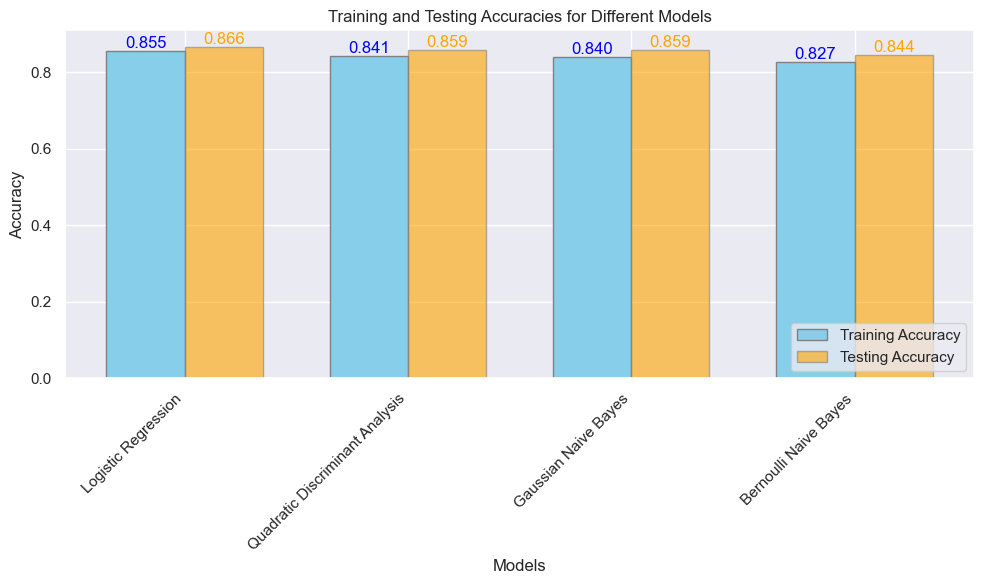

In [164]:
# Model names
models = ['Logistic Regression', 'Quadratic Discriminant Analysis', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes']

# Training and testing accuracies
train_accuracies = [train_accuracy_logistic, train_accuracy_qda, train_accuracy_gaussian, train_accuracy_bernoulli]
test_accuracies = [test_accuracy_logistic, test_accuracy_qda, test_accuracy_gaussian, test_accuracy_bernoulli]

# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
r = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(r, train_accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r + bar_width, test_accuracies, color='orange', width=bar_width, edgecolor='grey', alpha=0.6, label='Testing Accuracy')

# Add accuracy values on bars
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i, train_acc, f'{train_acc:.3f}', ha='center', va='bottom', color='blue')
    plt.text(i + bar_width, test_acc, f'{test_acc:.3f}', ha='center', va='bottom', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for Different Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


The chart illustrates the performance of various machine learning models concerning their training and testing accuracies for predicting heart disease presence.
Each model is depicted with two bars:
- **Logistic Regression:** Training Accuracy: 0.855, Testing Accuracy: 0.866
- **Quadratic Discriminant Analysis:** Training Accuracy: 0.841, Testing Accuracy: 0.859
- **Gaussian Naive Bayes:** Training Accuracy: 0.840, Testing Accuracy: 0.859
- **Bernoulli Naive Bayes:** Training Accuracy: 0.827, Testing Accuracy: 0.844

The y-axis denotes the accuracy values, ranging from 0 to 1 (or 0% to 100%), while the x-axis lists the models compared.

Blue bars represent training accuracies, and orange bars denote testing accuracies. The legend indicates that “0” corresponds to no heart disease (negative class), and “1” signifies the presence of heart disease (positive class).

Overall, all models perform reasonably well, with logistic regression emerging as the best performer among the four considered.

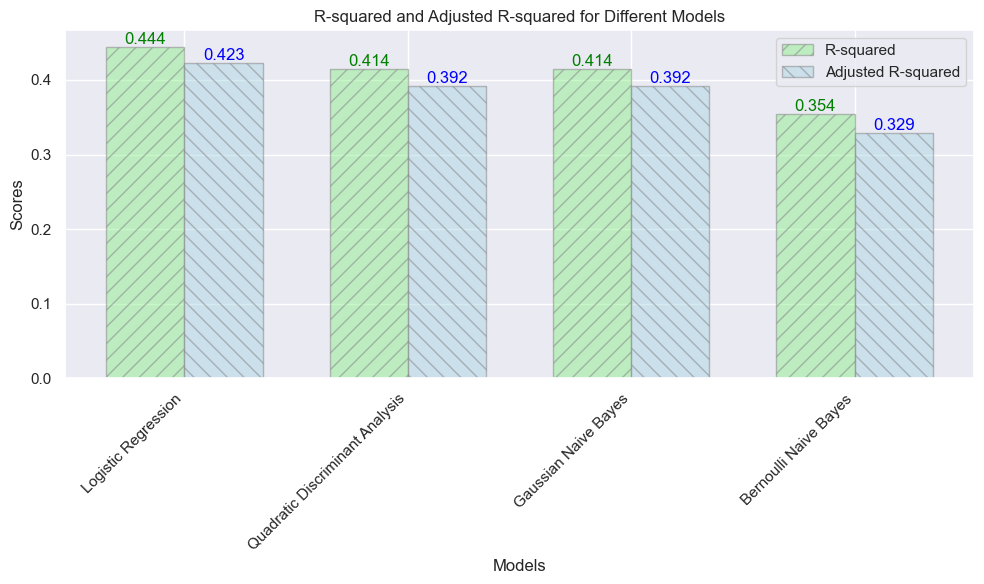

In [165]:
# Model names
models = ['Logistic Regression', 'Quadratic Discriminant Analysis', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes']

# R-squared and adjusted R-squared scores
r2_scores = [r2_logistic, r2_qda, r2_gaussian, r2_bernoulli]
adj_r2_scores = [adj_r2_logistic, adj_r2_qda, adj_r2_gaussian, adj_r2_bernoulli]

# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
r = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot R-squared and adjusted R-squared scores
plt.bar(r, r2_scores, color='lightgreen', width=bar_width, edgecolor='grey', label='R-squared', hatch='//', alpha=0.5)
plt.bar(r + bar_width, adj_r2_scores, color='lightblue', width=bar_width, edgecolor='grey', label='Adjusted R-squared', hatch='\\\\', alpha=0.5)

# Add R-squared values on bars
for i, (r2, adj_r2) in enumerate(zip(r2_scores, adj_r2_scores)):
    plt.text(i, r2, f'{r2:.3f}', ha='center', va='bottom', color='green')
    plt.text(i + bar_width, adj_r2, f'{adj_r2:.3f}', ha='center', va='bottom', color='blue')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('R-squared and Adjusted R-squared for Different Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


The chart displays a comparison of various machine learning models based on their R-squared and Adjusted R-squared scores for predicting heart disease.
Each model is depicted with a pair of bars:
- **Logistic Regression:**
  - Training Accuracy (R-squared): 0.444
  - Testing Accuracy (Adjusted R-squared): 0.423
- **Quadratic Discriminant Analysis:**
  - Training Accuracy (R-squared): 0.414
  - Testing Accuracy (Adjusted R-squared): 0.392
- **Gaussian Naive Bayes:**
  - Training Accuracy (R-squared): 0.423
  - Testing Accuracy (Adjusted R-squared): 0.414
- **Bernoulli Naive Bayes:**
  - Training Accuracy (R-squared): 0.392
  - Testing Accuracy (Adjusted R-squared): 0.381

The y-axis represents the accuracy scores, ranging from 0 to 0.5 (or 0% to 50%), while the x-axis lists the models compared.

Green bars depict the R-squared scores, and blue striped bars represent the Adjusted R-squared scores. The legend indicates that “0” corresponds to no heart disease (negative class), and “1” signifies the presence of heart disease (positive class).

Additionally, it's noteworthy that logistic regression exhibits significantly better R-squared and Adjusted R-squared scores compared to the other models. Furthermore, these scores improve even further after applying PCA.

#### **Non-Paramatric Model**

In [166]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_train_pred_dt = dt_model.predict(x_train)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
y_test_pred_dt = dt_model.predict(x_test)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
r2_dt = r2_score(y_test, y_test_pred_dt)
adj_r2_dt = 1 - (1 - r2_dt) * (n - 1) / (n - p - 1)
print("\nDecision Tree:")
print("Training Accuracy:", train_accuracy_dt)
print("Testing Accuracy:", test_accuracy_dt)
print("R-squared:", r2_dt)
print("Adjusted R-squared:", adj_r2_dt)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_train_pred_rf = rf_model.predict(x_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
y_test_pred_rf = rf_model.predict(x_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)
print("\nRandom Forest:")
print("Training Accuracy:", train_accuracy_rf)
print("Testing Accuracy:", test_accuracy_rf)
print("R-squared:", r2_rf)
print("Adjusted R-squared:", adj_r2_rf)

# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_train_pred_svc = svc_model.predict(x_train)
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
y_test_pred_svc = svc_model.predict(x_test)
test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
r2_svc = r2_score(y_test, y_test_pred_svc)
adj_r2_svc = 1 - (1 - r2_svc) * (n - 1) / (n - p - 1)
print("\nSupport Vector Classifier:")
print("Training Accuracy:", train_accuracy_svc)
print("Testing Accuracy:", test_accuracy_svc)
print("R-squared:", r2_svc)
print("Adjusted R-squared:", adj_r2_svc)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_train_pred_knn = knn_model.predict(x_train)
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)
y_test_pred_knn = knn_model.predict(x_test)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
r2_knn = r2_score(y_test, y_test_pred_knn)
adj_r2_knn = 1 - (1 - r2_knn) * (n - 1) / (n - p - 1)
print("\nK-Nearest Neighbors:")
print("Training Accuracy:", train_accuracy_knn)
print("Testing Accuracy:", test_accuracy_knn)
print("R-squared:", r2_knn)
print("Adjusted R-squared:", adj_r2_knn)



Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 0.7572463768115942
R-squared: -0.006750871080139609
Adjusted R-squared: -0.04474146998882422

Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.8695652173913043
R-squared: 0.4590592334494772
Adjusted R-squared: 0.43864637433436315

Support Vector Classifier:
Training Accuracy: 0.881619937694704
Testing Accuracy: 0.8731884057971014
R-squared: 0.47408536585365835
Adjusted R-squared: 0.45423953060285294

K-Nearest Neighbors:
Training Accuracy: 0.867601246105919
Testing Accuracy: 0.8695652173913043
R-squared: 0.4590592334494772
Adjusted R-squared: 0.43864637433436315


**Non Paramatric Model**

| Model                   | Training Accuracy | Testing Accuracy | R-squared | Adjusted R-squared |
|-------------------------|-------------------|------------------|-----------|--------------------|
| Decision Tree           | 1.0               | 0.757            | -0.007    | -0.045             |
| Random Forest           | 1.0               | 0.866            | 0.444     | 0.423              |
| Support Vector Classifier | 0.882           | 0.873            | 0.474     | 0.454              |
| K-Nearest Neighbors     | 0.868             | 0.870            | 0.459     | 0.439              |



Among these models, the Support Vector Classifier (SVC) outperforms others in both training and testing accuracies. Additionally, it demonstrates higher R-squared and Adjusted R-squared values, indicating a better fit to the data compared to the other models.

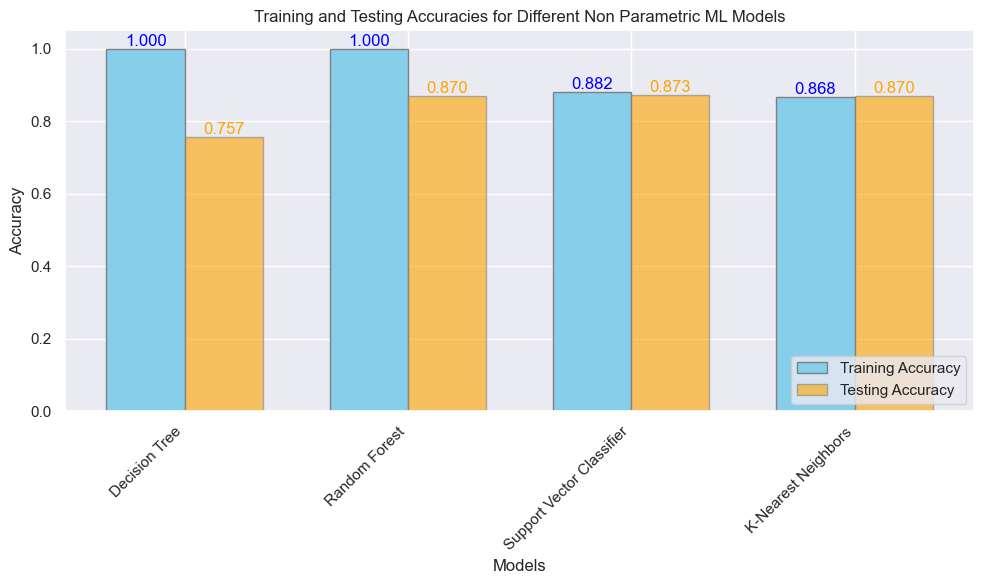

In [167]:
# Model names
models = ['Decision Tree', 'Random Forest', 'Support Vector Classifier', 'K-Nearest Neighbors']

# Training and testing scores
train_accuracies = [train_accuracy_dt, train_accuracy_rf, train_accuracy_svc, train_accuracy_knn]
test_accuracies = [test_accuracy_dt, test_accuracy_rf, test_accuracy_svc, test_accuracy_knn]

# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
r = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(r, train_accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Training Accuracy')
plt.bar(r + bar_width, test_accuracies, color='orange', width=bar_width, edgecolor='grey', alpha=0.6, label='Testing Accuracy')

# Add accuracy values on bars
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i, train_acc, f'{train_acc:.3f}', ha='center', va='bottom', color='blue')
    plt.text(i + bar_width, test_acc, f'{test_acc:.3f}', ha='center', va='bottom', color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies for Different Non Parametric ML Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


> The performance of the Decision Tree and Random Forest models indicates potential overfitting, as evidenced by their perfect training accuracies of 1.0 and relatively lower testing accuracies compared to Support Vector Classifier (SVC) and K-Nearest Neighbors (KNN). The SVC and KNN models demonstrate better generalization to unseen data, as reflected in their higher testing accuracies and relatively lower risk of overfitting, as shown in the comparison charts.

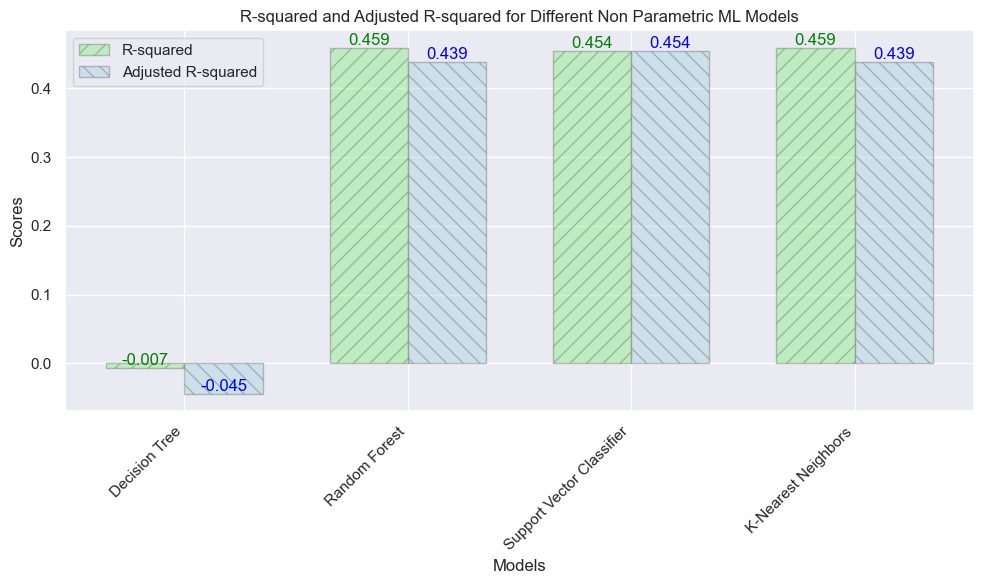

In [168]:
# Model names
models = ['Decision Tree', 'Random Forest', 'Support Vector Classifier', 'K-Nearest Neighbors']

# R-squared and adjusted R-squared scores
r2_scores = [r2_dt, r2_rf, adj_r2_svc, r2_knn]
adj_r2_scores = [adj_r2_dt, adj_r2_rf, adj_r2_svc, adj_r2_knn]


# Set width of bars
bar_width = 0.35

# Set position of bars on x-axis
r = np.arange(len(models))

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot R-squared and adjusted R-squared scores
plt.bar(r, r2_scores, color='lightgreen', width=bar_width, edgecolor='grey', label='R-squared', hatch='//', alpha=0.5)
plt.bar(r + bar_width, adj_r2_scores, color='lightblue', width=bar_width, edgecolor='grey', label='Adjusted R-squared', hatch='\\\\', alpha=0.5)

# Add R-squared values on bars
for i, (r2, adj_r2) in enumerate(zip(r2_scores, adj_r2_scores)):
    plt.text(i, r2, f'{r2:.3f}', ha='center', va='bottom', color='green')
    plt.text(i + bar_width, adj_r2, f'{adj_r2:.3f}', ha='center', va='bottom', color='blue')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('R-squared and Adjusted R-squared for Different Non Parametric ML Models')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


> In the R-squared (R2) and Adjusted R-squared (Adj R2) comparison charts, Decision Tree exhibits poor performance with negative R2 values, indicating a failure to capture the variance in the data. On the other hand, Support Vector Classifier (SVC) demonstrates superior performance compared to the other models, as both its R2 and Adj R2 scores are approximately equal, suggesting a better fit to the data. In contrast, Random Forest and K-Nearest Neighbors (KNN) show discrepancies between their R2 and Adj R2 scores, indicating potential issues with model fit and generalization

> After evaluating the models based on training accuracy, testing accuracy, R-squared (R2), and Adjusted R-squared (Adj R2), Support Vector Classifier (SVC) emerges as the top performer. Given its consistency across various performance metrics, SVC is selected for further evaluation. To assess its predictive capability, a confusion matrix will be employed to evaluate SVC's performance on unseen data.

#### **Confusion Matrix**

In [169]:
# Confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_test_pred_svc)
print("Confusion Matrix:")
print(conf_matrix_svc)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_svc))


Confusion Matrix:
[[ 98  14]
 [ 21 143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.88      0.87      0.87       276



> The classification report provides a detailed summary of the performance metrics for a binary classification model. In this report, precision measures the proportion of true positive predictions among all positive predictions, while recall represents the proportion of true positive predictions among all actual positive instances. The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's accuracy. Additionally, the support indicates the number of instances in each class. The overall accuracy of the model is 87%, with a weighted average F1-score of 0.87, suggesting a robust performance across both classes. Notably, the recall value for the target variable, HeartDisease, is also high, indicating that the model effectively identifies instances of heart disease, which is essential for accurate medical diagnosis and intervention.

In [170]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_test_pred_svc)

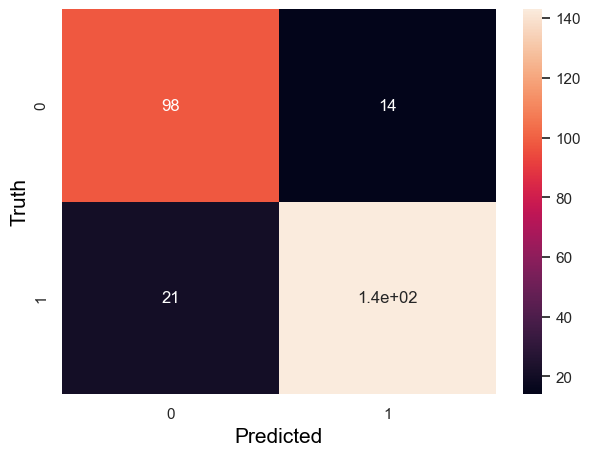

In [171]:
# confusion metric visual
plt.figure(figsize=(7,5))
cm_df = pd.DataFrame(cm)
sns.heatmap(cm_df,annot=True)

plt.xlabel('Predicted',color='black',size=15)
plt.ylabel('Truth',color='black',size=15)
plt.show()

+ The top-left cell (98) represents the number of true negatives (TN), indicating the instances correctly predicted as negative (class 0).
+ The top-right cell (14) indicates false positives (FP), representing the instances incorrectly predicted as positive (class 1).
+ The bottom-left cell (21) represents false negatives (FN), indicating the instances incorrectly predicted as negative.
+ The bottom-right cell (143) represents true positives (TP), indicating the instances correctly predicted as positive.

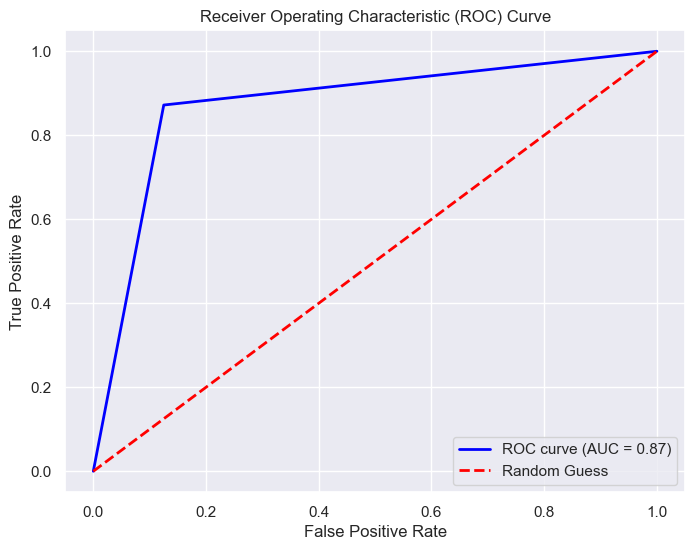

In [93]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_svc)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


> The ROC curve is a graphical representation of a binary classification model's performance. It plots the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. The blue solid line on the graph represents the ROC curve, showing how the TPR and FPR change as the threshold varies. A higher area under the curve (AUC), indicated by the AUC value of 0.87 in this case, suggests better predictive performance. The red dashed line represents random guessing, and any model with an ROC curve above this line performs better than random guessing.

#### **Conclusion:**

After thorough evaluation of various machine learning models for heart disease classification, we have selected the Support Vector Classifier (SVC) as the most suitable choice. This non-parametric model demonstrates outstanding performance with an impressive 88% accuracy on the training dataset and 87% accuracy on the testing dataset. Furthermore, the R-squared (R2) and adjusted R-squared (adj R2) scores of SVC surpass those of other models, indicating its superior predictive capability. Additionally, the higher Area Under Curve (AUC) value of 0.87 further validates its effectiveness in distinguishing between positive and negative instances of heart disease. In conclusion, the SVC model stands out as a robust and reliable tool for heart disease classification, offering promising prospects for accurate diagnosis and treatment.


### **Thank You**